In [1]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [2]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.3 MB/s eta 0:00:00


In [3]:
pip install numpy==1.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.


In [1]:
# load libraries
import numpy as np
import spacy
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
import keras
import re
import seaborn as sns
from collections import Counter
from itertools import chain
from tqdm import tqdm
import networkx as nx
import contractions

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Register `tqdm` with `pandas`
tqdm.pandas()
from rich.console import Console
from rich.table import Table

import gensim
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel, Phrases
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords

from wordcloud import WordCloud
from tqdm import tqdm
from collections import Counter

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# EDA

In [3]:
dfall = pd.read_csv('/content/combined_final.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60492 entries, 0 to 60491
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10322 non-null  float64
 1   Comment          60432 non-null  object 
 2   Name             59761 non-null  object 
 3   Date             60492 non-null  object 
 4   Pos              10322 non-null  float64
 5   Neg              10322 non-null  float64
 6   Neu              10322 non-null  float64
 7   Model            60492 non-null  object 
 8   sentiment_score  60492 non-null  float64
 9   Source           60492 non-null  object 
dtypes: float64(5), object(5)
memory usage: 4.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
dfall = dfall.drop(['Unnamed: 0','Pos','Neg','Neu'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Select only pisonheads and forums

In [5]:
sources_to_filter = ['Pistonheads', 'Forums']
df = dfall[dfall['Source'].isin(sources_to_filter)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df = df.drop_duplicates(subset=['Comment'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Comment_len'] = df['Comment'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46029 entries, 10322 to 60491
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Comment          46029 non-null  object        
 1   Name             45513 non-null  object        
 2   Date             46029 non-null  datetime64[ns]
 3   Model            46029 non-null  object        
 4   sentiment_score  46029 non-null  float64       
 5   Source           46029 non-null  object        
 6   Comment_len      46029 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date  sentiment_score   Comment_len
count                          46029     46029.000000  46029.000000
mean   2020-07-24 07:22:01.227921408         2.926047    245.441070
min              2009-10-16 00:00:00         1.000000      1.000000
25%              2018-05-09 00:00:00         2.000000     84.000000
50%              2021-08-14 00:00:00         3.000000    169.000000
75%              2022-09-29 00:00:00         4.000000    320.000000
max              2023-07-31 00:00:00         5.000000   2270.000000
std                              NaN         1.347376    248.619078

In [ ]:
print(pd.__version__)

2.0.3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df['Date'].describe())

count                            46029
mean     2020-07-24 07:22:01.227921408
min                2009-10-16 00:00:00
25%                2018-05-09 00:00:00
50%                2021-08-14 00:00:00
75%                2022-09-29 00:00:00
max                2023-07-31 00:00:00
Name: Date, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


***Summary***

**Comment** : There are total number of 46029 comments after removing duplicates.

**Comment Length** : Min length of comment is 1 and max is 2,270 characters with a median of 167.

**Date**: Dates range 2009-10-16 to 2023-07-31. The median is 2021-11-05, and the mean is 2021-08-14, indicating a higher concentration of data in recent years. The 25% and 75% percentiles at 2018-05-09 and 2022-09-29, respectively, show that most of the data falls within this range.

**Sentiment score** : A mean score of 2.94, indicating that most sentiments are neutral to slightly positive.

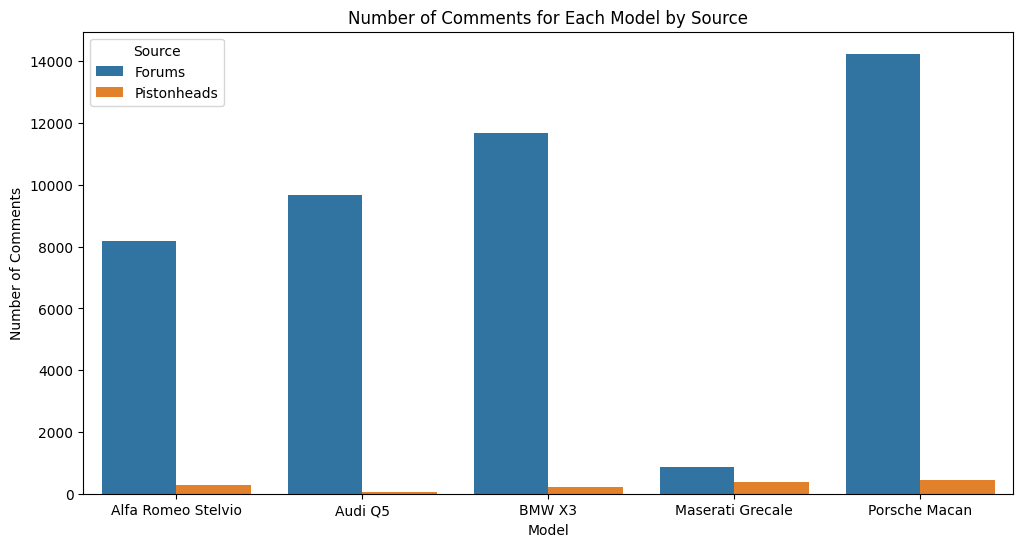

In [ ]:
grouped = df.groupby(['Source', 'Model'])['Comment'].count().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Model', y='Comment', hue='Source')
plt.title('Number of Comments for Each Model by Source')
plt.xlabel('Model')
plt.ylabel('Number of Comments')
plt.show()


In [ ]:
# Filter for 'pistonheads' and group by 'Name' and 'Model' to get the count of records for each name and model
df_pistonheads = df[df['Source'] == 'Pistonheads'].groupby(['Name', 'Model'], as_index=False).size().rename(columns={'size': 'count'})

# Sort the pistonheads names by count in descending order and display the top 10
df_pistonheads = df_pistonheads.sort_values(by='count', ascending=False)
print("Pistonheads Names and Models:")
print(df_pistonheads.head(10))

# Filter for 'forum' and group by 'Name' and 'Model' to get the count of records for each name and model
df_forum = df[df['Source'] == 'Forums'].groupby(['Name', 'Model'], as_index=False).size().rename(columns={'size': 'count'})

# Sort the forum names by count in descending order and display the top 10
df_forum = df_forum.sort_values(by='count', ascending=False)
print("\nForum Names and Models:")
print(df_forum.head(10))


Pistonheads Names and Models:
              Name               Model  count
29            Ares  Alfa Romeo Stelvio     15
369     SidewaysSi       Porsche Macan     14
538     cerb4.5lee       Porsche Macan     13
166        GrantD5              BMW X3     13
660       nickfrog  Alfa Romeo Stelvio     12
738  swanseaboydan       Porsche Macan     12
82       Cobnapint       Porsche Macan     10
67             CDP       Porsche Macan      9
474        Yidwann  Alfa Romeo Stelvio      9
255    MarkGArgyle              BMW X3      8

Forum Names and Models:
                Name               Model  count
2512            cue2  Alfa Romeo Stelvio   1331
2105  Wing Commander       Porsche Macan    770
1000           Jon A       Porsche Macan    767
3182         missile             Audi Q5    661
1809          Skyway       Porsche Macan    544
1379        Neil1911       Porsche Macan    541
1821        Snow Man             Audi Q5    452
2015          Tracky       Porsche Macan    434
2329   

In [ ]:
# Filter for 'pistonheads', 'Grecale', and group by 'Name' to get the count of records for each name
df_pistonheads = df[(df['Source'] == 'Pistonheads') & (df['Model'] == 'Maserati Grecale')].groupby('Name', as_index=False).size().rename(columns={'size': 'count'})

# Sort the pistonheads names by count in descending order and display the top 10
df_pistonheads = df_pistonheads.sort_values(by='count', ascending=False)
print("Pistonheads Top Names for Grecale:")
print(df_pistonheads.head(10))

# Filter for 'forum', 'Grecale', and group by 'Name' to get the count of records for each name
df_forum = df[(df['Source'] == 'Forums') & (df['Model'] == 'Maserati Grecale')].groupby('Name', as_index=False).size().rename(columns={'size': 'count'})

# Sort the forum names by count in descending order and display the top 10
df_forum = df_forum.sort_values(by='count', ascending=False)
print("\nForum Top Names for Grecale:")
print(df_forum.head(10))

Pistonheads Top Names for Grecale:
                     Name  count
78   Manic Street Sleeper      8
32              DeltaEvo2      8
63           Julian Scott      7
155        anonymous-user      6
127                  TA14      5
173               ducnick      5
95                 NGK210      5
132        Tony Del Monte      5
22                    CDP      4
208                pb8g09      4

Forum Top Names for Grecale:
                Name  count
29               EDZ    119
104          WarrenB     57
124             edit     54
97          Tony Mac     48
90             TF007     38
37             Geoff     29
1        1stMaserati     26
99          UKTrofeo     18
40   GrecaleQVTrofeo     18
61     MaseratiCares     13


In [ ]:
# Group by 'Name' and get the count of unique models and total comments for each name
df_name_stats = df.groupby('Name', as_index=False).agg({'Model': 'nunique', 'Comment': 'size'}).rename(columns={'Model': 'unique_model_count', 'Comment': 'total_comments'})

# Filter for names that have commented on more than one car model
df_multi_model_names = df_name_stats[df_name_stats['unique_model_count'] > 1]

# Sort by total_comments in descending order
df_multi_model_names = df_multi_model_names.sort_values(by='total_comments', ascending=False)

# Get the models each name has made comments on
df_models_per_name = df.groupby('Name', as_index=False).agg({'Model': lambda x: ', '.join(x.unique())})

# Merge the two DataFrames to add the models as a new column
df_multi_model_names = pd.merge(df_multi_model_names, df_models_per_name, on='Name')

# Filter for names that have commented on the 'Grecale' model
df_grecale_commenters = df_multi_model_names[df_multi_model_names['Model'].str.contains('Grecale')]

#print("Names who have commented on more than one car model, including Grecale, sorted by total comments, along with models they have commented on:")
#print(df_grecale_commenters)
#print("Names who have commented on more than one car model, sorted by total comments, along with models they have commented on:")
#print(df_multi_model_names)

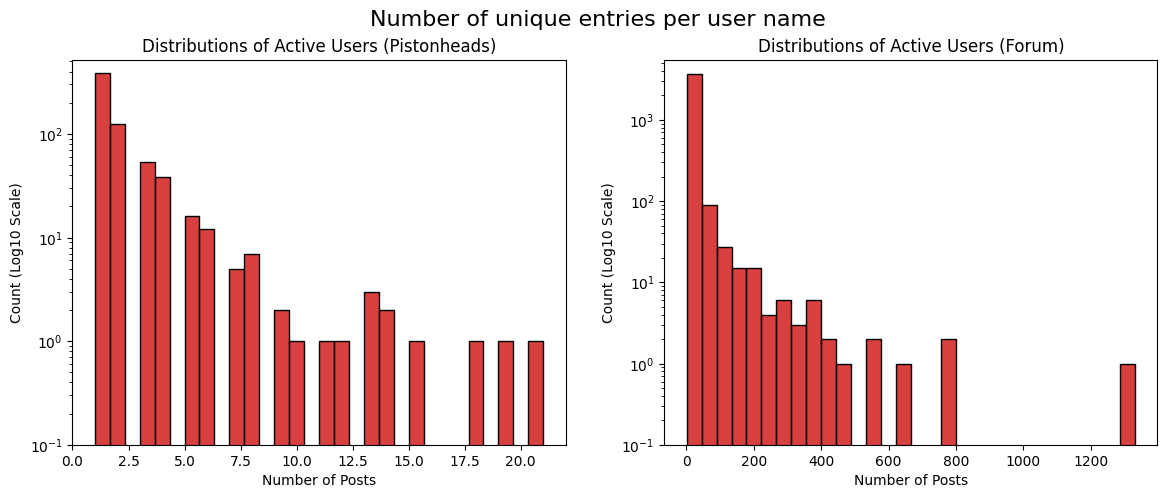

In [ ]:
# Group by 'Source' and 'Name', and get the count of records for each name
df_user_counts = df.groupby(['Source', 'Name'], as_index=False).size().rename(columns={'size': 'count'})

# Separate the data into two DataFrames, one for 'Pistonheads' and one for 'Forum'
df_pistonheads = df_user_counts[df_user_counts['Source'] == 'Pistonheads']
df_forum = df_user_counts[df_user_counts['Source'] == 'Forums']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Create a histogram of active users with a log10 scale for the y-axis for 'Pistonheads' source
sns.histplot(df_pistonheads['count'], bins=30, color="#cc0000", ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_xlabel('Number of Comment')
axs[0].set_ylabel('Count (Log10 Scale)')
axs[0].set_title('Distributions of Active Users (Pistonheads)')
axs[0].set_ylim(bottom=0.1) # set bottom limit to avoid issues with log10 scale

# Create a histogram of active users with a log10 scale for the y-axis for 'Forum' source
sns.histplot(df_forum['count'], bins=30, color="#cc0000", ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_xlabel('Number of Comment')
axs[1].set_ylabel('Count (Log10 Scale)')
axs[1].set_title('Distributions of Active Users (Forum)')
axs[1].set_ylim(bottom=0.1) # set bottom limit to avoid issues with log10 scale

plt.suptitle('Number of unique entries per user name', fontsize=16)
plt.show()

# Preprocessing

In [49]:
custom_stop_words = {'stelvio','audi','q5','bmw','x3','grecale','maserati','alfa','romeo',
                     'porsche','macan','macans','look','say','ehh','yay','bit','looks','like',
                     'car','vehicle','get','drive','review','think','come','probably',
                     'briefly','well','guy','man','suv','guys','kilometer','km','mile','meh',
                     'okay','sure','tapatalk','manic','cars','say','sir','know','tell',
                     'goes','etc','say','go','ie','good','time','need','want','thank','say',
                     'lot','see','hi','yes','yea','etc','give','actually','halo','thing'}

nlp = spacy.load('en_core_web_sm')
custom_stop_words = {word.lower() for word in custom_stop_words}  # Convert custom stop words to lowercase
nlp.Defaults.stop_words |= custom_stop_words  # Add custom stop words to SpaCy's stop words list


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Ensure that the is_stop property reflects the updated stop words
for word in nlp.Defaults.stop_words:
    lex = nlp.vocab[word]
    lex.is_stop = True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
def clean_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Expand contractions
    comment = contractions.fix(comment)

    # Decode from non-ASCII encoding if necessary
    comment = comment.encode('ascii', 'ignore').decode('utf-8')

    # Remove URLs using regular expression
    comment = re.sub(r'http\S+', '', comment)
    comment = re.sub(r'www\.\S+', '', comment)

    # Remove patterns like "username said:" along with any subsequent text
    comment = re.sub(r'\w+(?:\s+\w+)*\s+said:', '', comment, flags=re.IGNORECASE)

    # Remove variations of "Sent from my iPhone using Bimmerfest"
    comment = re.sub(r'sent from my .*? using ?bimmerfest.*', '', comment)
    comment = re.sub(r'send .*? usingbimmerf\s?mobile app', '', comment)
    comment = re.sub(r'usingbimmerf mobile app', '', comment)

    # Remove variations of "Sent from my using Tapatalk" and similar phrases
    comment = re.sub(r'sent from my .*? using ?tapatalk.*', '', comment)

    # Remove usernames starting with '@'
    comment = re.sub(r'@\w+', '', comment)

    #remove click to expand
    comment = re.sub(r'click to expand\.\.\.', '', comment)

    # Remove special characters
    comment = re.sub(r'[^\w\s]', ' ', comment)

    # Remove any pattern that matches "edited by [any username] on [any date]"
    comment = re.sub(r'edited by [\w\s]+ on [\w\s\d:]+', '', comment)

    # Remove extra spaces
    comment = re.sub(r'\s+', ' ', comment).strip()

    # Parse the text with SpaCy. This runs the entire pipeline.
    doc = nlp(comment)

    # Remove punctuation symbols and filter tokens that are not in the printable set of characters.
    tokens = [token for token in doc if not token.is_punct and all([ch in string.printable for ch in token.text]) and len(token.text) >= 2]

    # Now filter out stop words and non-alphabetic tokens
    cleaned_tokens = [token.lemma_ for token in tokens if not token.is_stop and token.lemma_.isalpha()]

    # Join cleaned tokens back into a string
    cleaned_comment = ' '.join(cleaned_tokens)

    return cleaned_comment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the function to the 'Comment' column and display a progress bar
df['Cleaned_Comment'] = df['Comment'].progress_apply(clean_comment)

In [ ]:
# Drop rows where length less than 5 characters
df = df[df['Comment_len'] >= 5]

In [ ]:
# Count the frequency of each word in the cleaned_comments
word_counts = Counter(' '.join(df['Cleaned_Comment']).split())

# Filter out words that occur less than 2 times
filtered_words = {word for word, count in word_counts.items() if count >= 2}

# Update the cleaned_comment column to only include filtered words
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(lambda comment: ' '.join([word for word in comment.split() if word in filtered_words]))

In [ ]:
df

In [ ]:
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)


In [ ]:
df['Cleaned_Comment'] = df['Cleaned_Comment'].progress_apply(remove_stopwords)

In [ ]:
compound_words = {'audi q5', 'mercedes glc', 'direct message',
                  'good luck', 'porsche macan', 'bmw x3', 'maserati grecale',
                  'alfa romeo stelvio', 'alfa romeo'}


In [ ]:
def remove_compound_words(text, compound_words):
    """Remove compound words from a text."""
    # Create a regex pattern to match the compound words inside the function
    pattern = r'\b(?:' + '|'.join(re.escape(phrase) for phrase in compound_words) + r')\b'
    return re.sub(pattern, '', text)

In [ ]:
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(lambda comment: remove_compound_words(comment, compound_words))

In [ ]:
df.to_csv('PistonHead_Forums_Cleaned_1.csv')

# Bigrams #

In [2]:
df = pd.read_csv('/content/PistonHead_Forums_Cleaned_With_Topic.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
grouped_df = df.groupby('Model')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df['Cleaned_Comment'] = df['Cleaned_Comment'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45912 entries, 0 to 45911
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          45912 non-null  int64  
 1   Comment             45912 non-null  object 
 2   Name                45398 non-null  object 
 3   Date                45912 non-null  object 
 4   Model               45912 non-null  object 
 5   sentiment_score     45912 non-null  float64
 6   Source              45912 non-null  object 
 7   Comment_len         45912 non-null  int64  
 8   Cleaned_Comment     45912 non-null  object 
 9   Topic_Distribution  45912 non-null  object 
 10  Dominant_Topic      45912 non-null  int64  
 11  Topic_Scores        45912 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


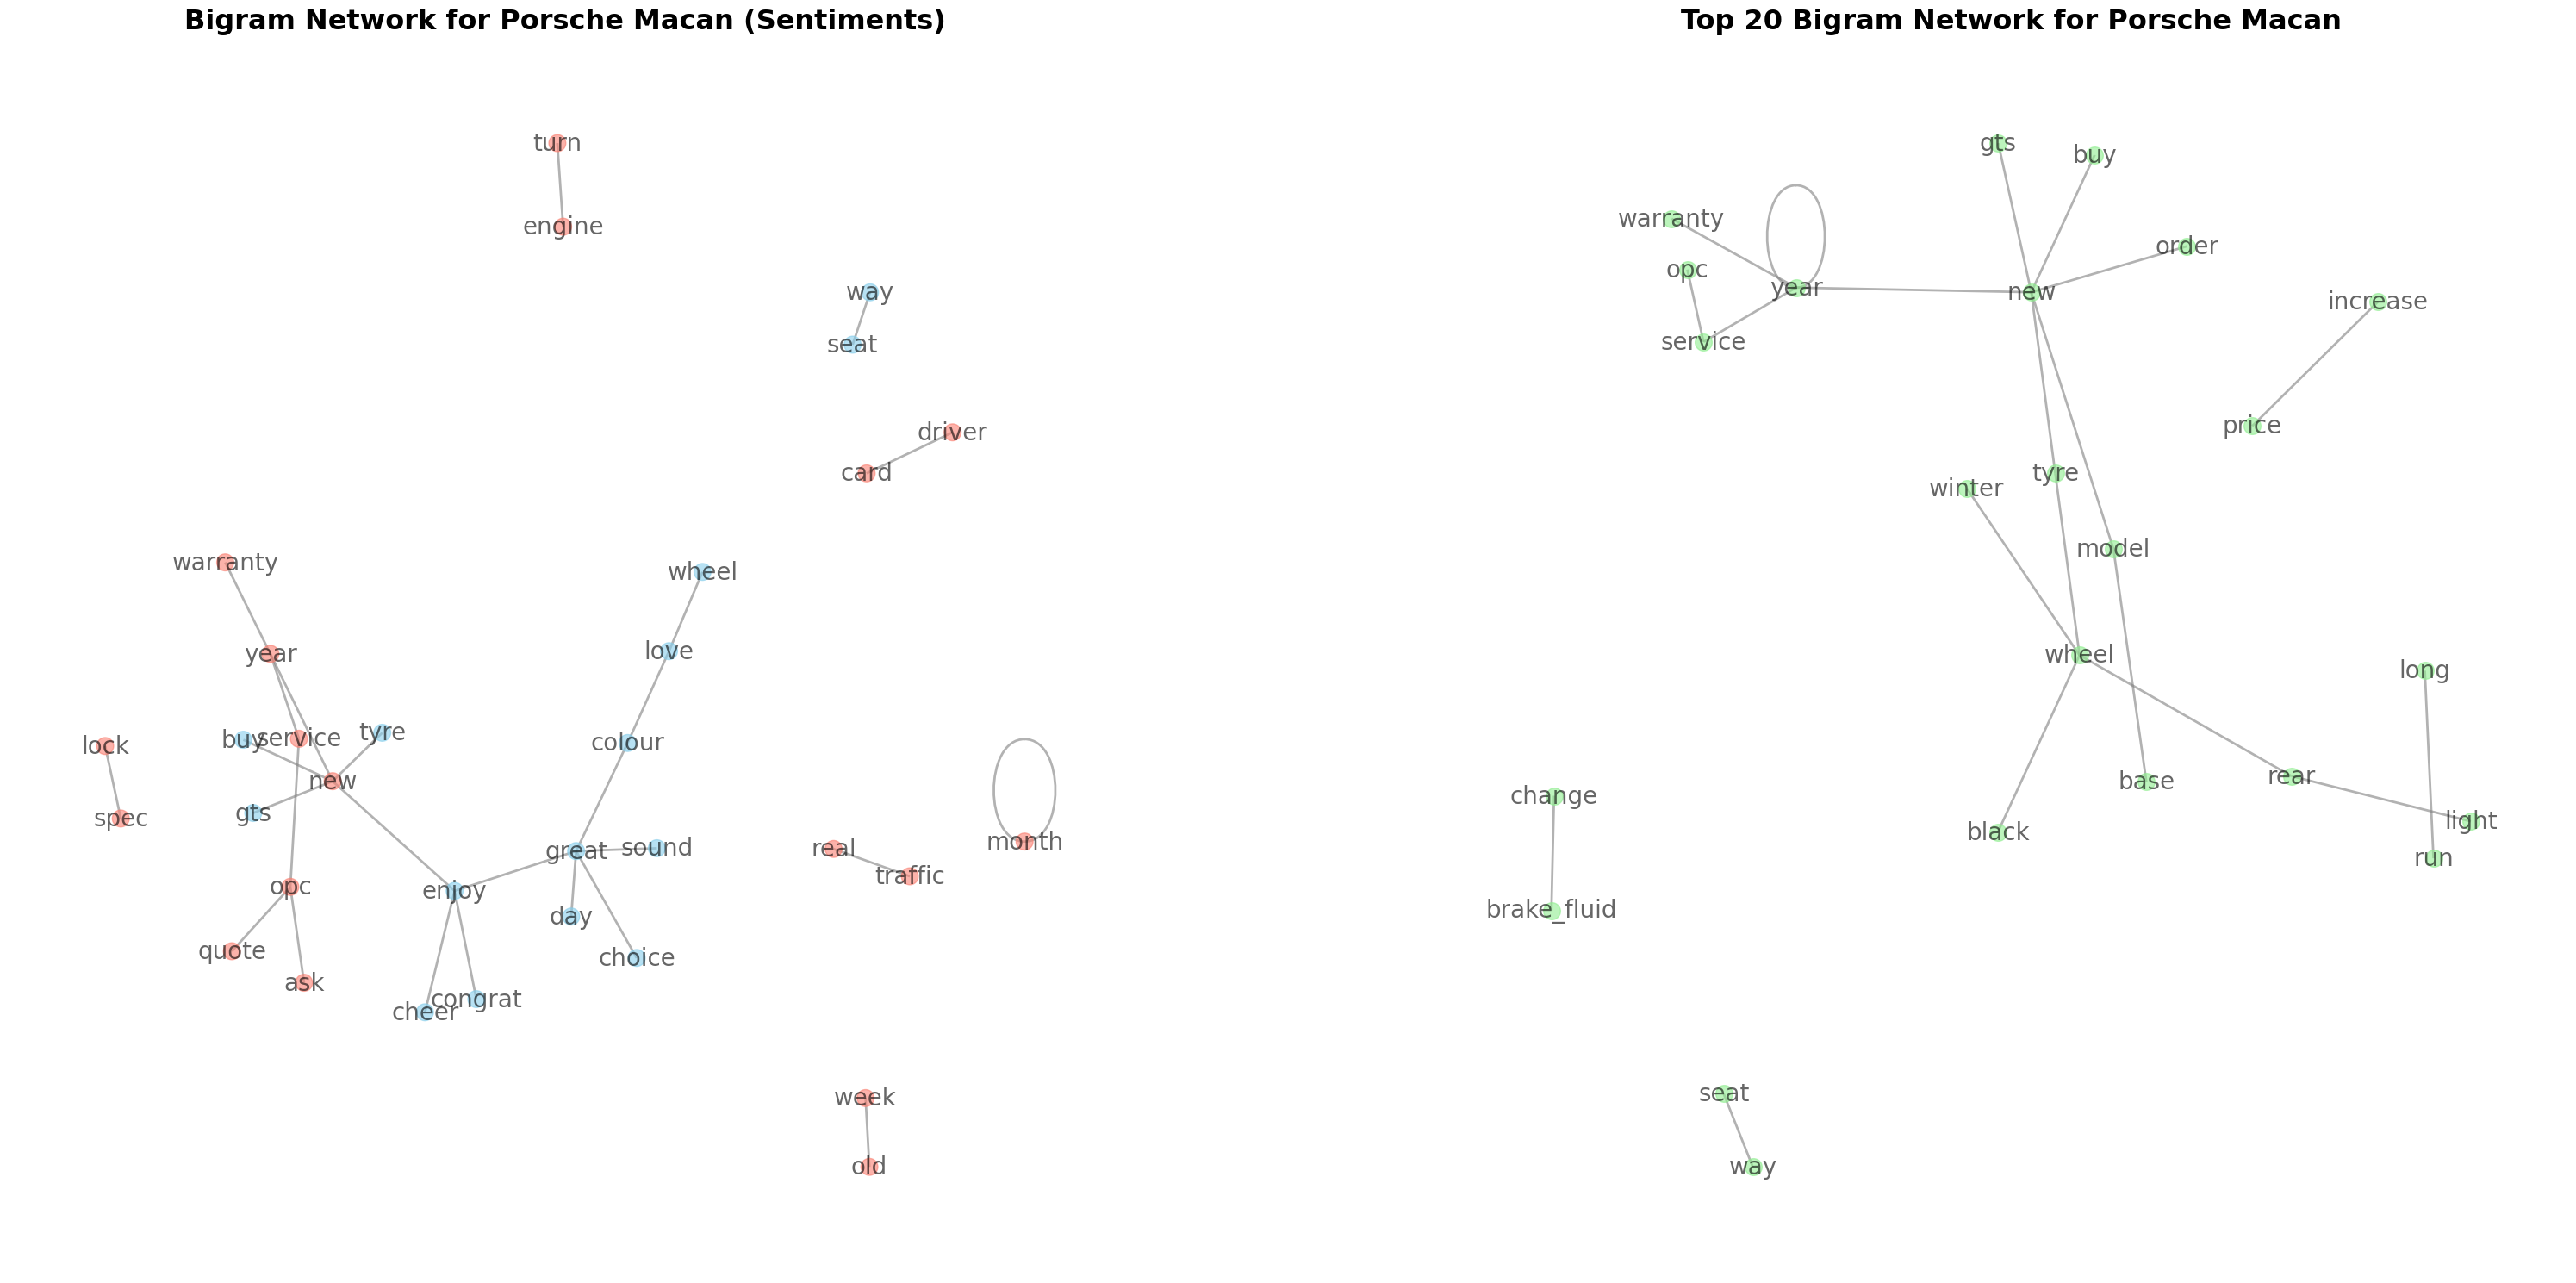

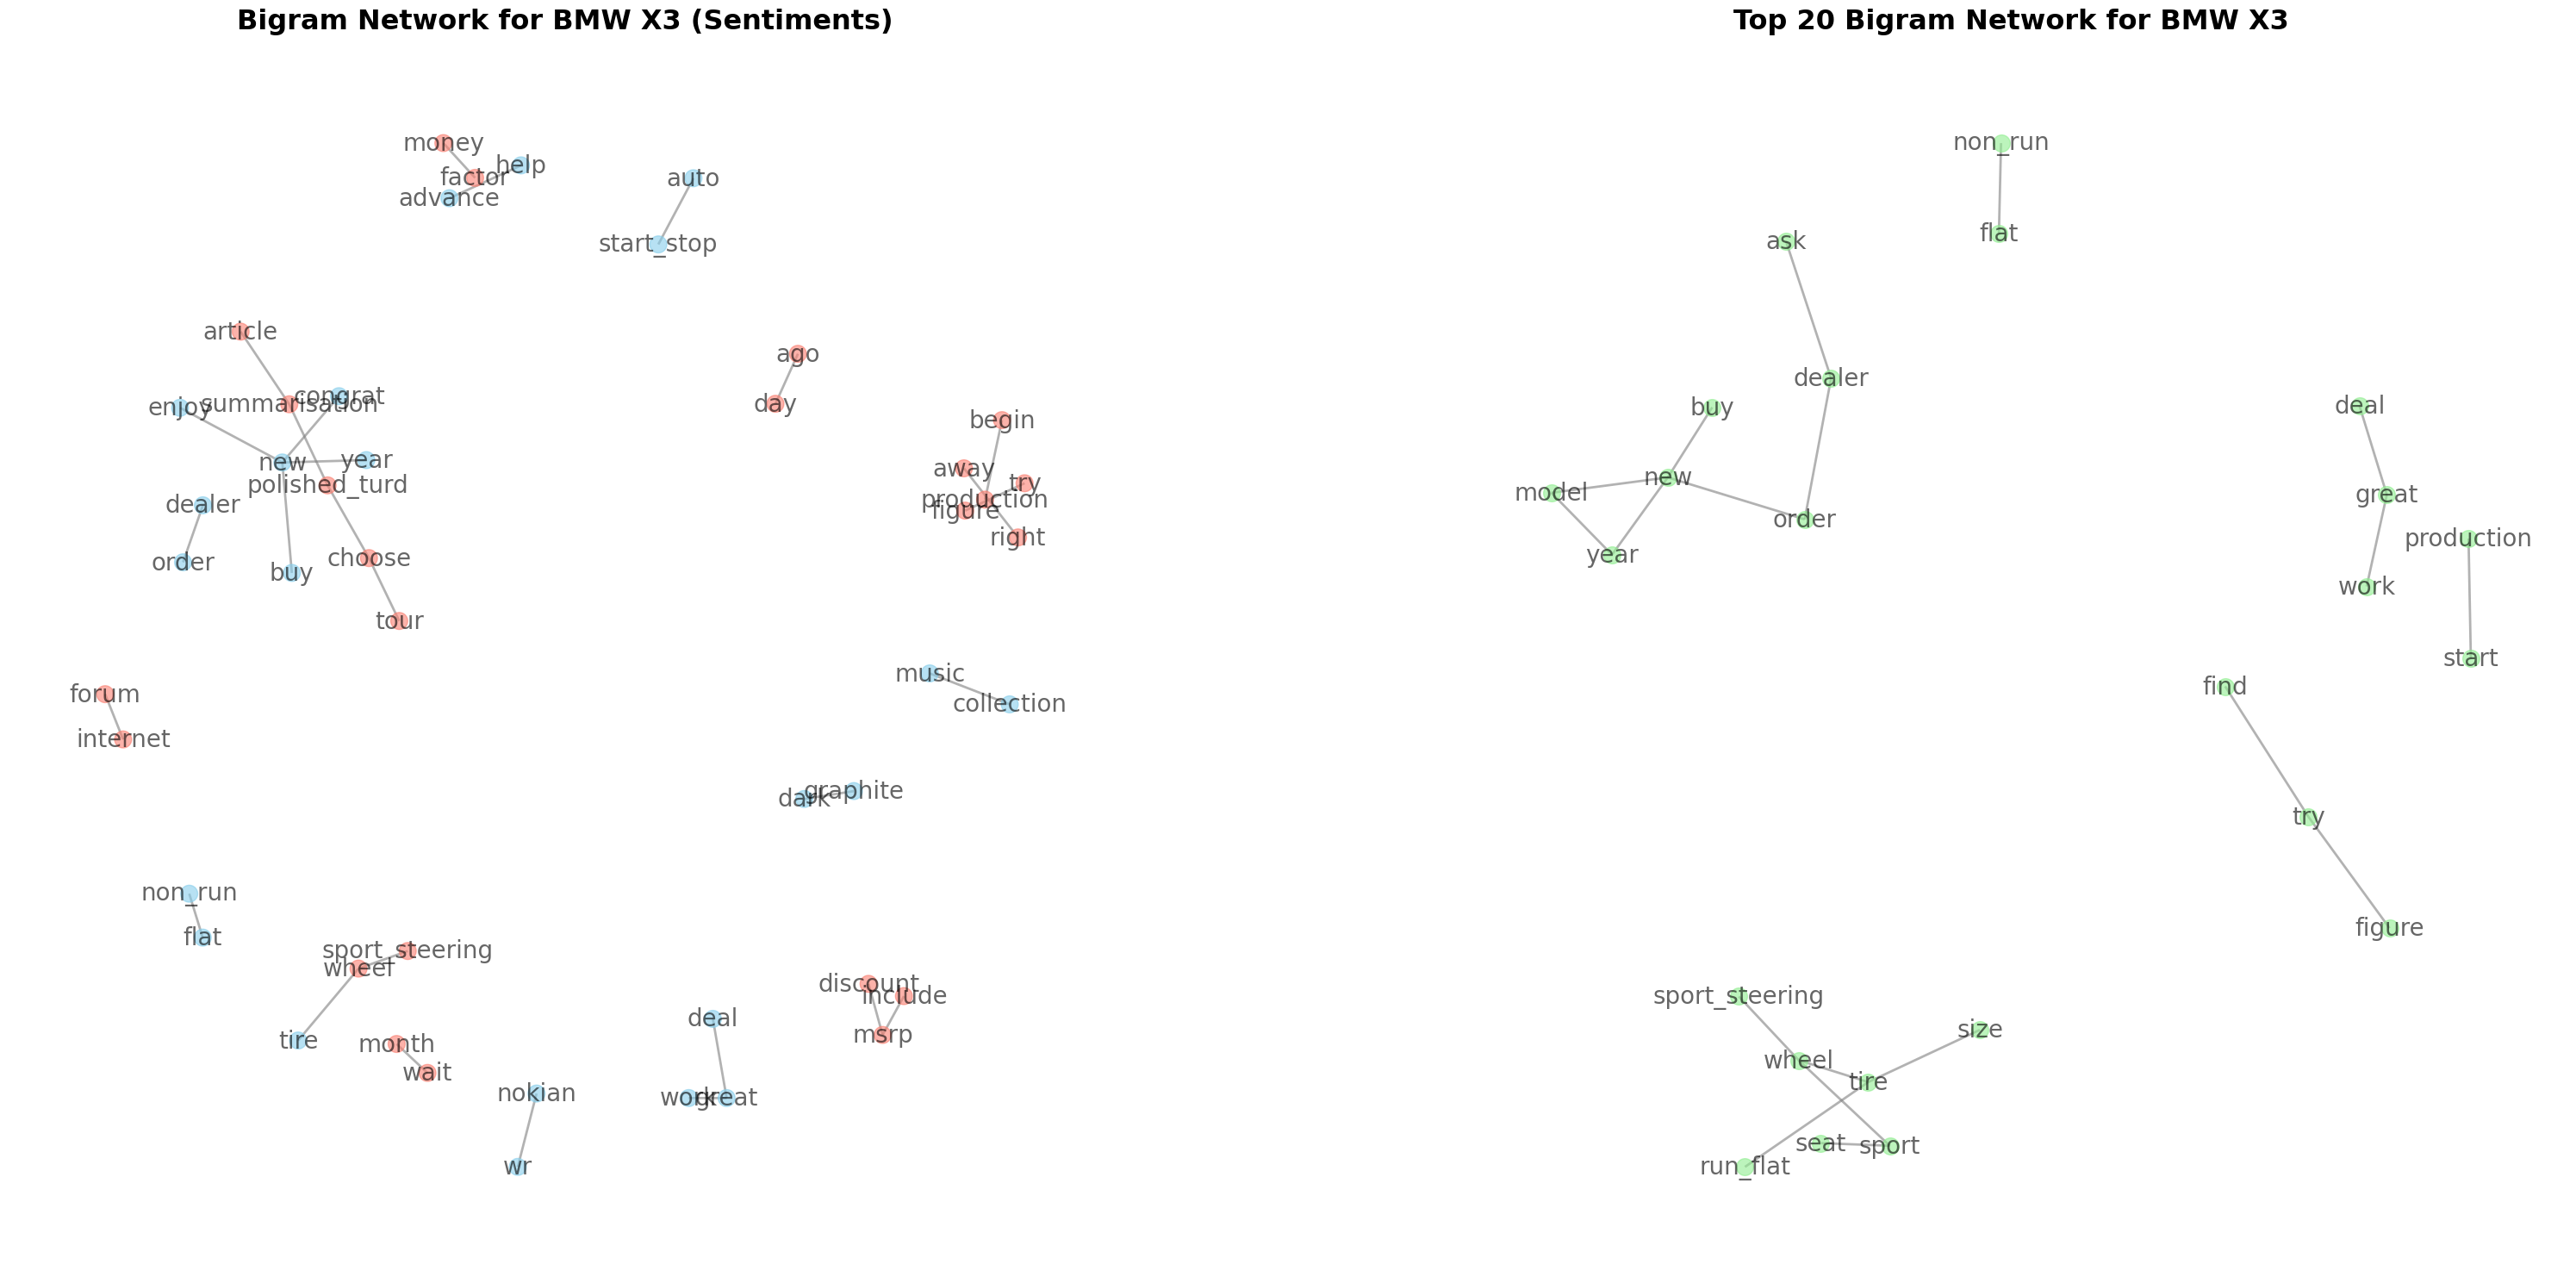

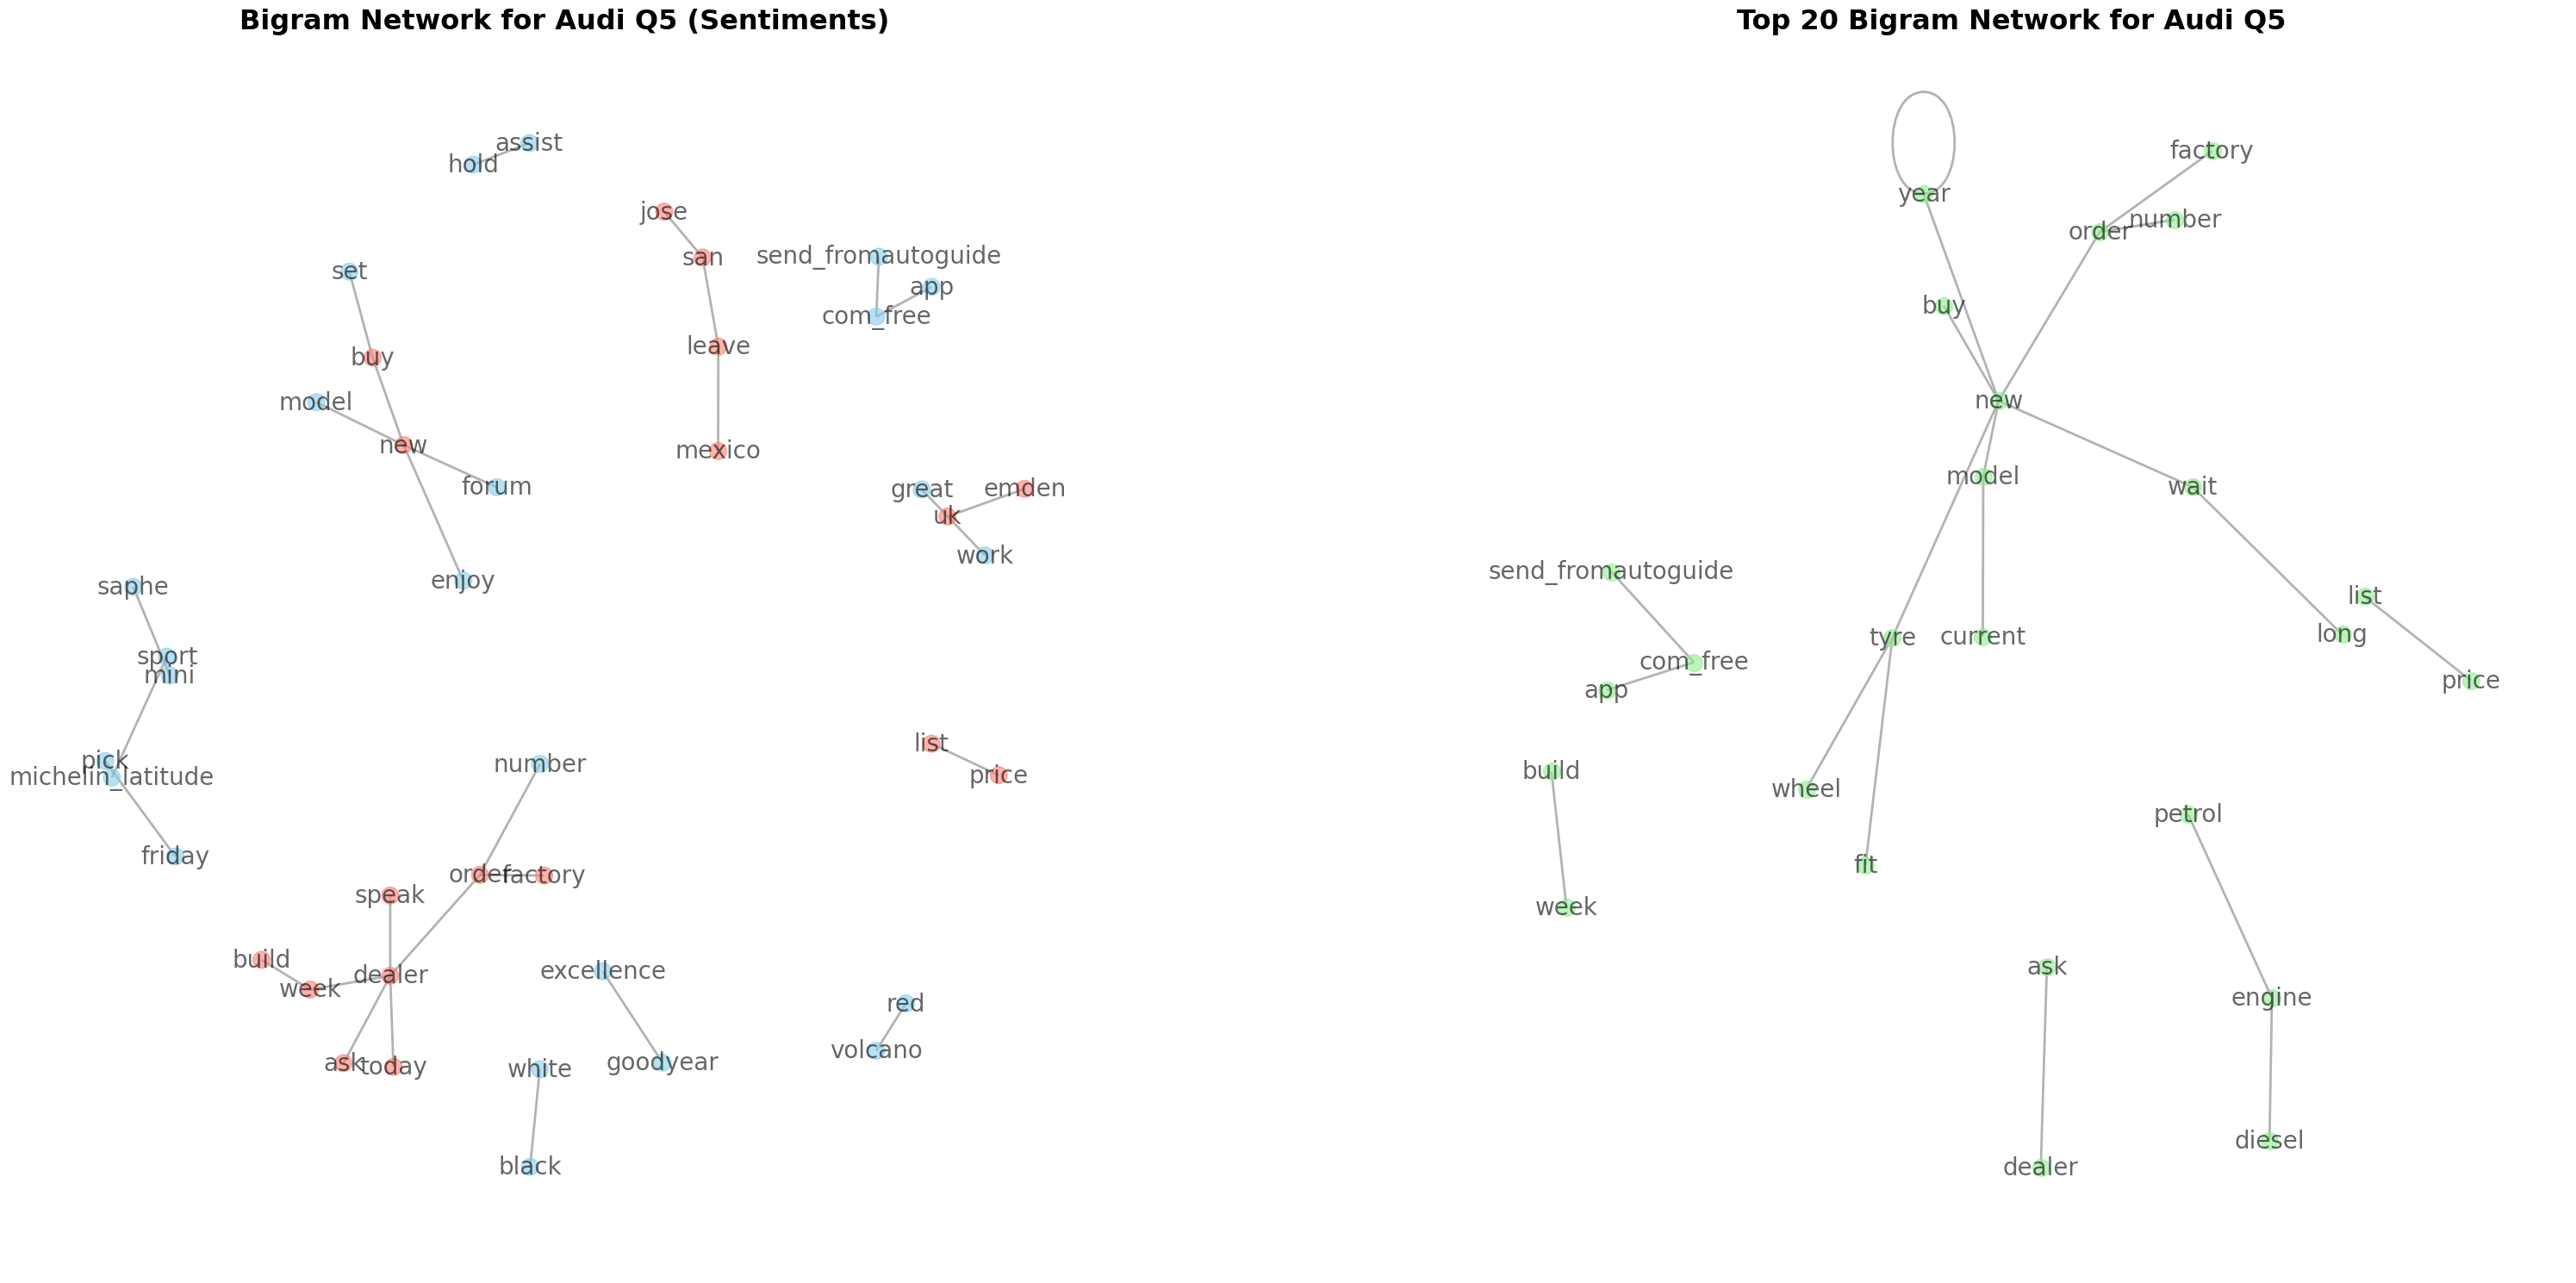

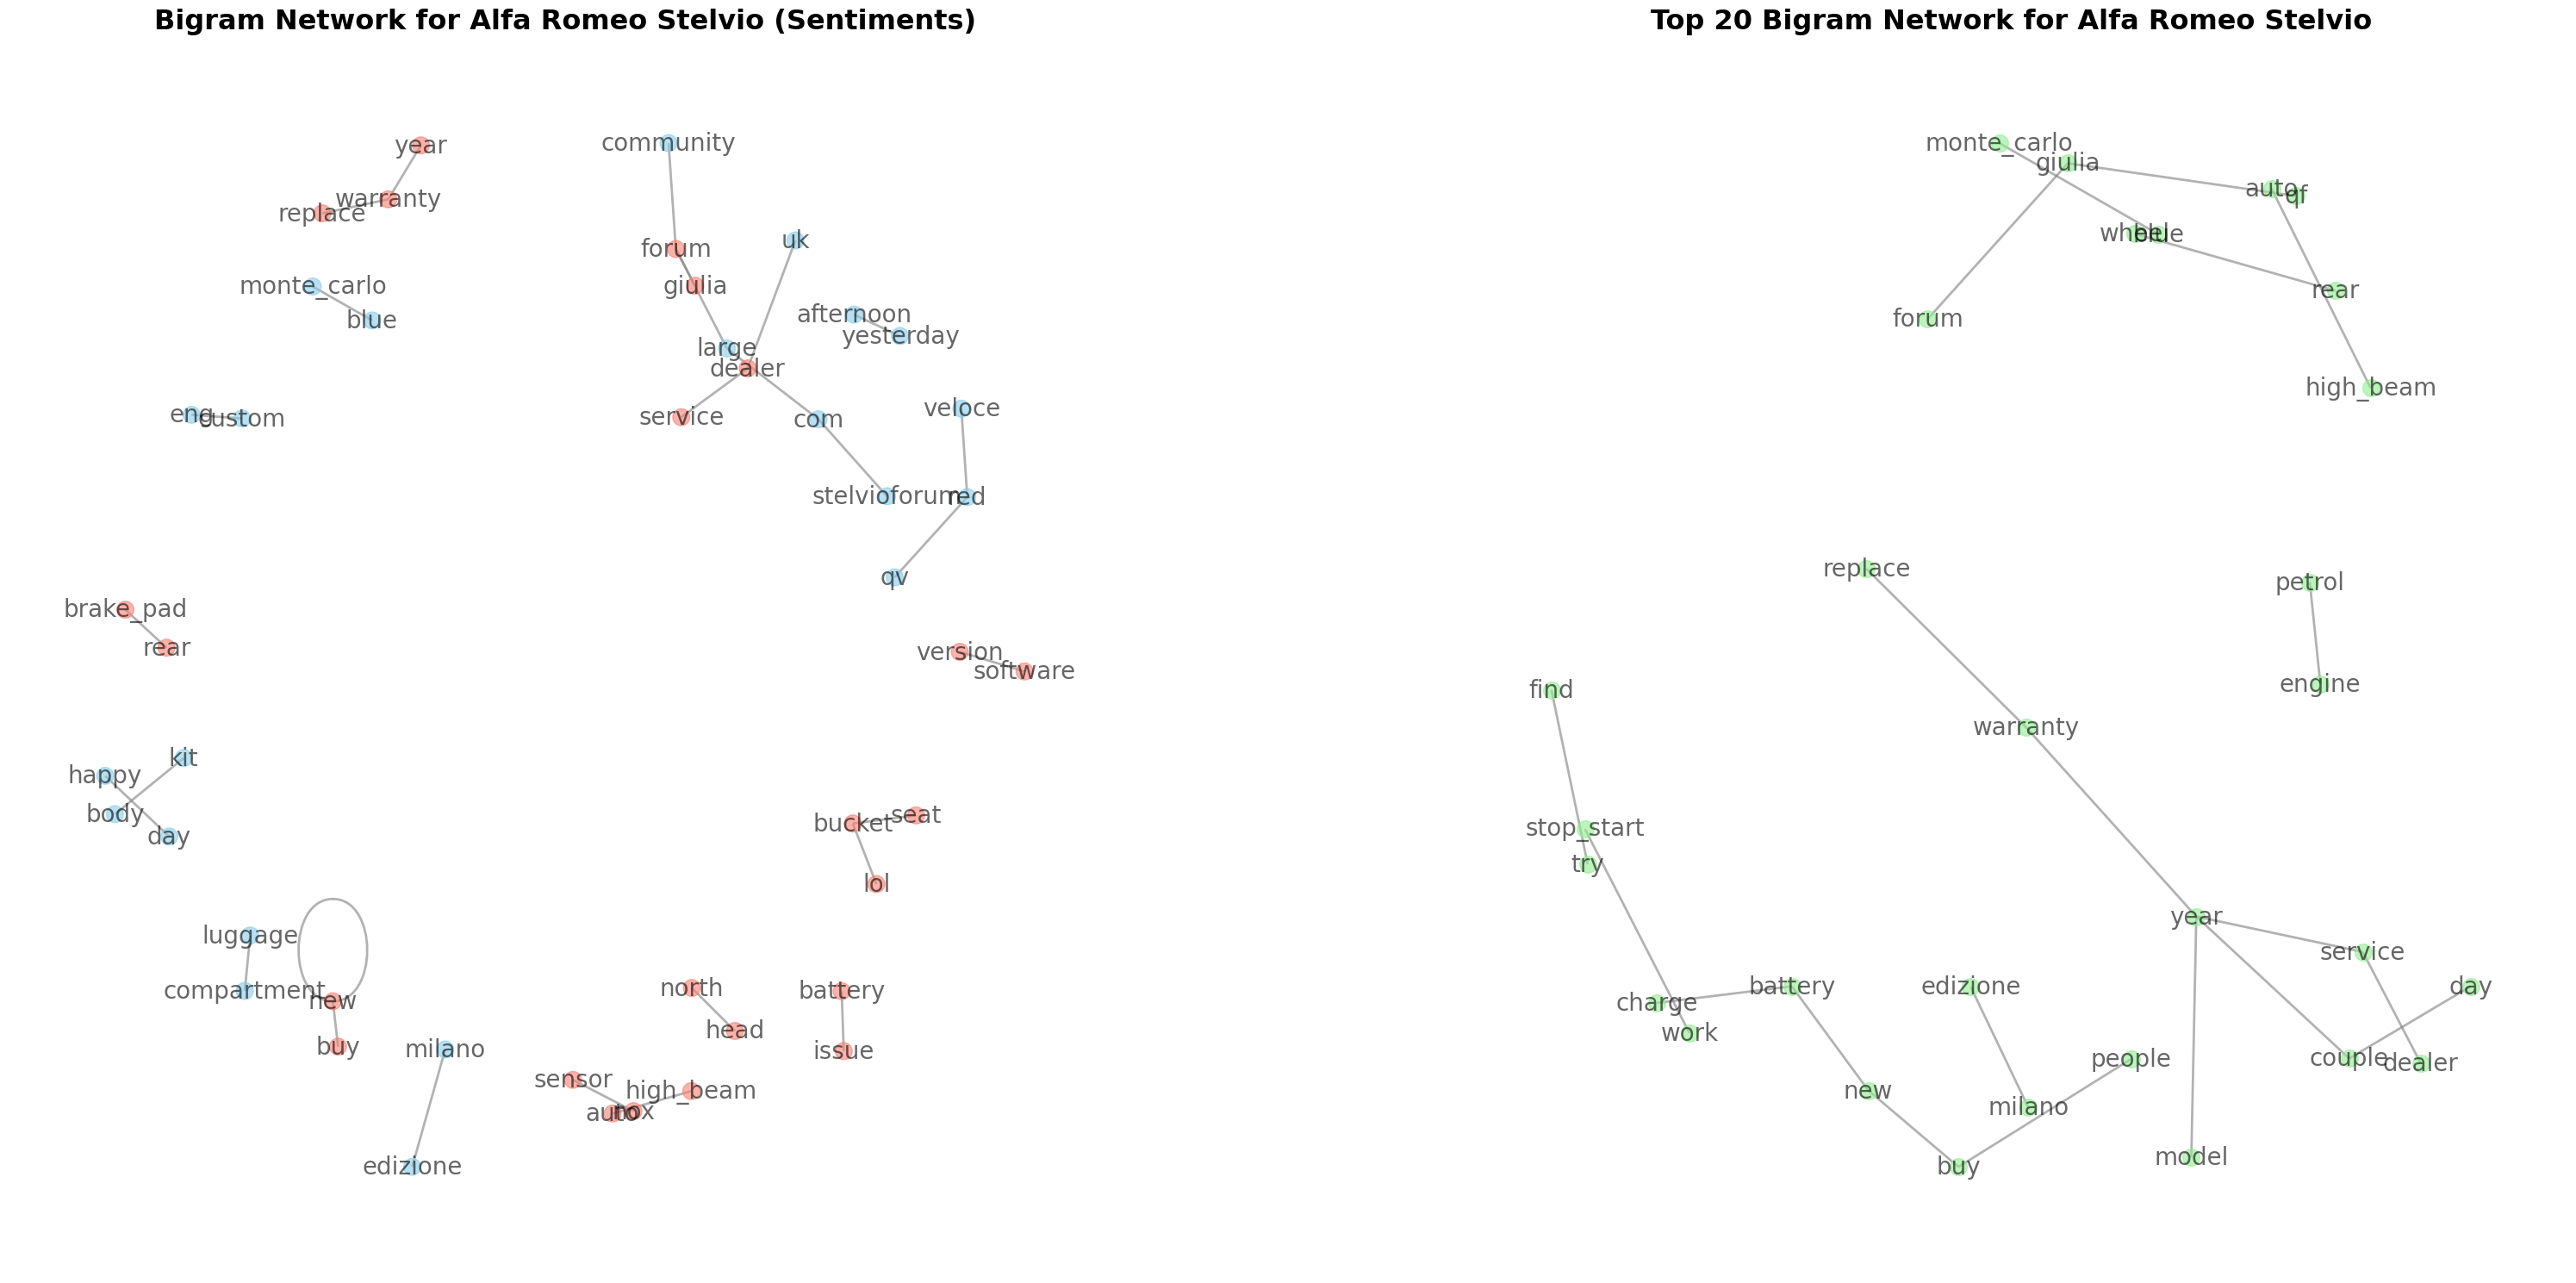

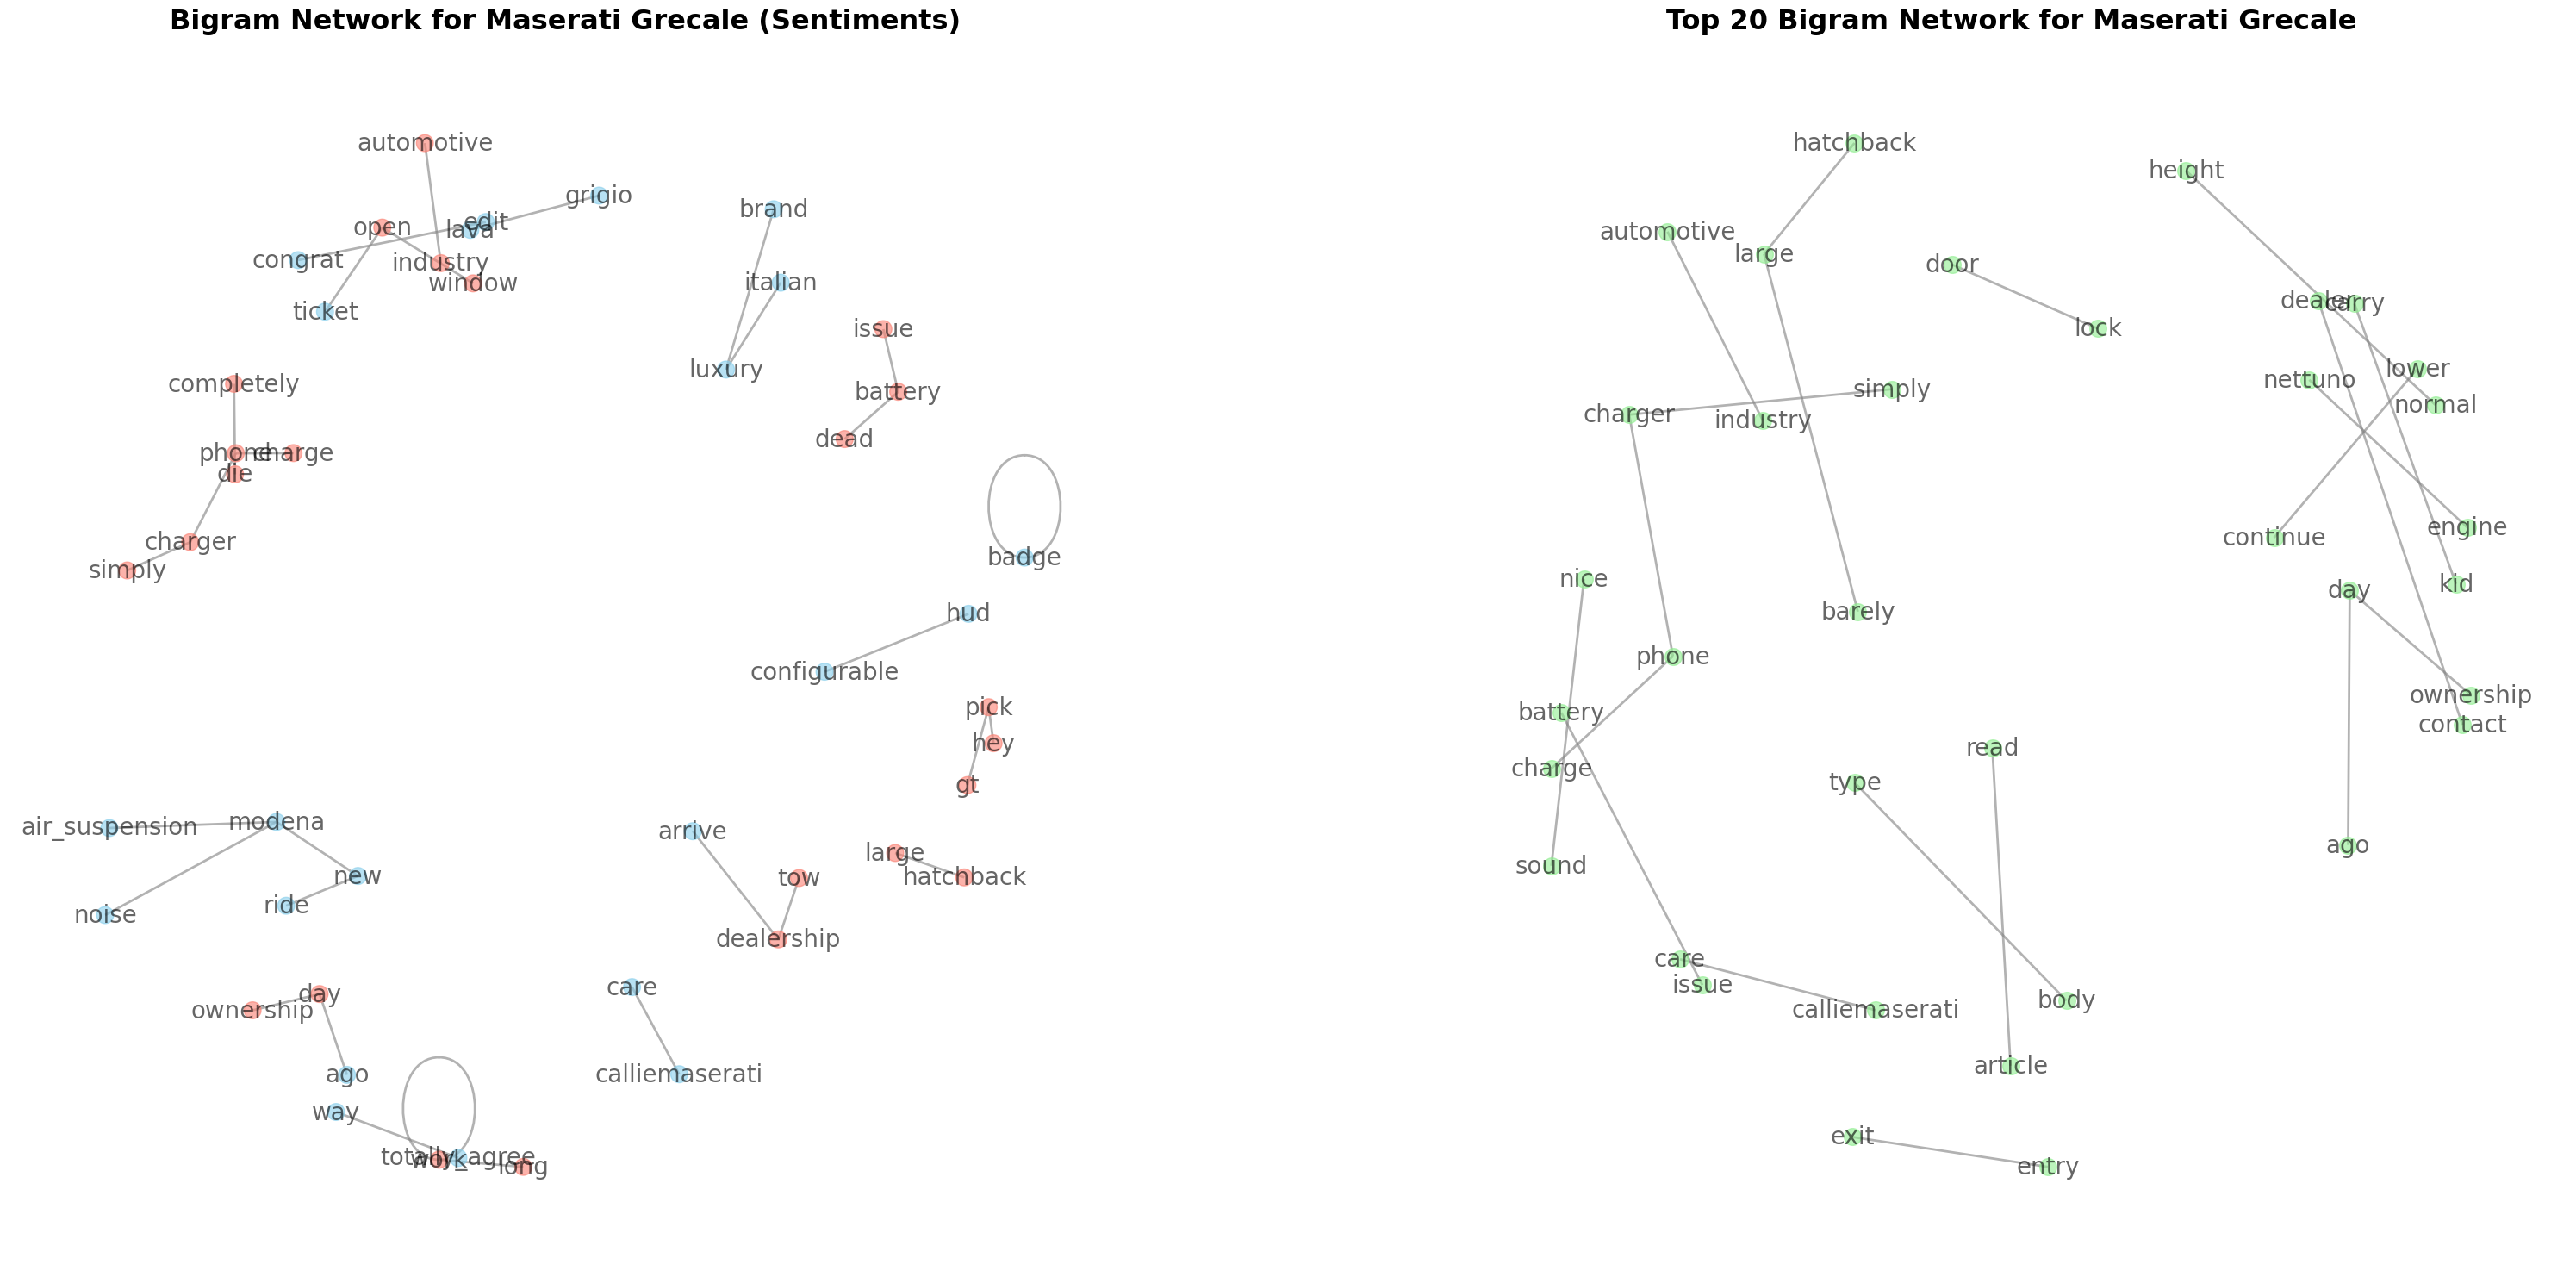

In [15]:
import nltk
nltk.download('stopwords')
from nltk.util import ngrams
from itertools import chain
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def get_bigrams(df):
    bigrams = df['Cleaned_Comment'].apply(lambda x: list(ngrams(nltk.word_tokenize(x), 2)))
    flat_bigrams = list(chain(*bigrams))
    stop_words = set(stopwords.words('english'))
    filtered_bigrams = [(w1, w2) for w1, w2 in flat_bigrams if w1.lower() not in stop_words and w2.lower() not in stop_words]
    bigram_counts = Counter(filtered_bigrams)
    df_bigram_counts = pd.DataFrame(bigram_counts.most_common(), columns=['bigram', 'count'])
    df_bigram_counts[['word1', 'word2']] = pd.DataFrame(df_bigram_counts['bigram'].tolist(), index=df_bigram_counts.index)
    df_bigram_counts.dropna(inplace=True)
    return df_bigram_counts

def plot_bigram_network_for_model(model, df):
    # Filter the comments for the specified model
    model_comments = df[df['Model'] == model]

    # Filter comments based on sentiment score
    negative_comments = model_comments[model_comments['sentiment_score'].isin([1])]
    positive_comments = model_comments[model_comments['sentiment_score'].isin([5])]

    # Get the top 10 bigrams for both negative and positive sentiment
    top_neg_bigrams = get_bigrams(negative_comments).head(15)
    top_pos_bigrams = get_bigrams(positive_comments).head(15)

    # Create a graph using NetworkX
    G = nx.Graph()

    # Add edges to the graph based on the top bigrams and their counts
    for i, row in top_neg_bigrams.iterrows():
        G.add_edge(row['word1'], row['word2'], weight=row['count'], sentiment='negative')
    for i, row in top_pos_bigrams.iterrows():
        G.add_edge(row['word1'], row['word2'], weight=row['count'], sentiment='positive')

    # Create a node color list
    node_colors = []
    for node in G.nodes():
        if any(G[u][v]['sentiment'] == 'negative' for u, v in G.edges(node)):
            node_colors.append('salmon')
        else:
            node_colors.append('skyblue')

    # Use spring_layout to position the nodes
    pos_layout = nx.spring_layout(G, k=0.6, seed=50)

    # Create a figure with 2 side-by-side plots
    fig, axs = plt.subplots(1, 2, figsize=(30, 15))  # 1 row, 2 columns

    # Plotting the first graph
    plt.sca(axs[0])  # Set the current axis to axs[0] (left plot)
    nx.draw(G, pos_layout, with_labels=True, font_size=20, node_size=200, node_color=node_colors, edge_color='gray', width=2.0, alpha=0.6)
    plt.title(f'Bigram Network for {model} (Sentiments)', fontsize=23, fontweight='bold')

    # Plotting the top 20 bigrams regardless of sentiment
    top_20_bigrams = get_bigrams(model_comments).head(20)

    G_top20 = nx.Graph()
    for i, row in top_20_bigrams.iterrows():
        G_top20.add_edge(row['word1'], row['word2'], weight=row['count'])

    pos_layout_top20 = nx.spring_layout(G_top20, k=1.5, seed=50)
    plt.sca(axs[1])  # Set the current axis to axs[1] (right plot)
    nx.draw(G_top20, pos_layout_top20, with_labels=True, font_size=20, node_size=200, node_color='lightgreen', edge_color='gray', width=2.0, alpha=0.6)
    plt.title(f'Top 20 Bigram Network for {model}', fontsize=23, fontweight='bold')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Loop through each unique model and plot
for model in df['Model'].unique():
    plot_bigram_network_for_model(model, df)


## Try 1

In [17]:
grecale_df = df[df['Model'] == 'Maserati Grecale']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
grecale_df['Cleaned_Comment'] = grecale_df['Cleaned_Comment'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-1ee0af380893>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grecale_df['Cleaned_Comment'] = grecale_df['Cleaned_Comment'].astype(str)


In [22]:
# Converting each cleaned comment into a list of words
texts = grecale_df['Cleaned_Comment'].apply(lambda x: x.split()).tolist()

# Train the bigram model
bigram = Phrases(texts, min_count=20)

# Apply the bigram model to the texts
texts = [bigram[doc] for doc in texts]

# Update the DataFrame with the transformed texts
grecale_df['Cleaned_Comment'] = [' '.join(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-c24aaf621f06>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grecale_df['Cleaned_Comment'] = [' '.join(text) for text in texts]


In [23]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than X documents,
# or more than X% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Create the corpus.  This is a Term Frequency
# or Bag of Words representation.
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')


Number of unique tokens: 172
Number of documents: 1224


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Set parameters for the LDA model
NUM_TOPICS = 10
chunksize = 2000
passes = 6
iterations = 50
eval_every = 2
temp = dictionary[0]
id2word = dictionary.id2token

# Train the LDA model
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
def compute_coherence_values(dictionary, corpus, texts,
                             cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha='auto',
                         eta='auto',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=42,)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
limit=50
start=2
step=2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
coherence_values = compute_coherence_values(dictionary=dictionary,
                                            corpus=corpus,
                                            texts=texts,
                                            cohere='c_v',
                                            start=start,
                                            limit=limit,
                                            step=step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

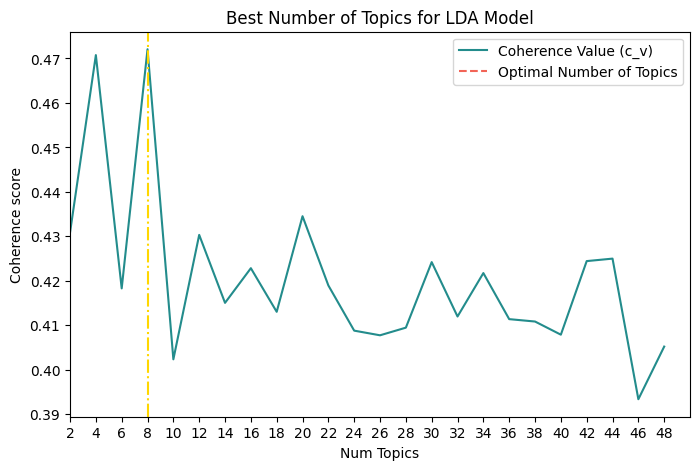

In [29]:
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("Best Number of Topics for LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics

plt.axvline(x=8, color='#FFD700', linestyle='-.')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C',
                          ls='-', label='Coherence Value (c_v)'),
                   Line2D([0], [1], color='#F26457',
                          ls='--', label='Optimal Number of Topics')]

ax.legend(handles=legend_elements, loc='upper right')

In [32]:
temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=100,
    num_topics=8,
    passes=8,
    random_state = 42,
    eval_every=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.092*"dealer" + 0.040*"arrive" + 0.038*"week" + 0.037*"production" + 0.029*"interior" + 0.025*"position" + 0.024*"update" + 0.023*"start" + 0.023*"contact" + 0.021*"mean"')
(1, '0.045*"people" + 0.040*"point" + 0.038*"year" + 0.036*"design" + 0.036*"suvs" + 0.035*"new" + 0.030*"sell" + 0.029*"big" + 0.028*"estate" + 0.027*"trofeo"')
(2, '0.051*"charge" + 0.043*"dealer" + 0.043*"trofeo" + 0.042*"work" + 0.040*"phone" + 0.030*"issue" + 0.028*"different" + 0.027*"hud" + 0.027*"dealership" + 0.025*"software"')
(3, '0.040*"model" + 0.037*"order" + 0.036*"uk" + 0.033*"price" + 0.032*"month" + 0.030*"new" + 0.030*"dealer" + 0.028*"wait" + 0.025*"maybe" + 0.023*"buy"')
(4, '0.060*"door" + 0.055*"find" + 0.048*"engine" + 0.046*"sound" + 0.040*"lock" + 0.039*"lower" + 0.030*"close" + 0.030*"new" + 0.029*"park" + 0.025*"open"')
(5, '0.031*"bad" + 0.030*"nice" + 0.030*"change" + 0.029*"issue" + 0.028*"right" + 0.027*"button" + 0.027*"love" + 0.026*"display" + 0.026*"care" + 0.025*"long"')
(6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_viz)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LDA

In [32]:
df1 = pd.read_csv('/content/PistonHead_Forums_Cleaned_1.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df1 = df1.drop(['Unnamed: 0'],axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
df1['Cleaned_Comment'] = df1['Cleaned_Comment'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Converting each cleaned comment into a list of words
texts = df1['Cleaned_Comment'].apply(lambda x: x.split()).tolist()

# Train the bigram model
bigram = Phrases(texts, min_count=20)

# Apply the bigram model to the texts
texts = [bigram[doc] for doc in texts]

# Update the DataFrame with the transformed texts
df1['Cleaned_Comment'] = [' '.join(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than X documents,
# or more than X% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Create the corpus.  This is a Term Frequency
# or Bag of Words representation.
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 3980
Number of documents: 45912


In [43]:
import logging
logger = logging.getLogger('my_logger')

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s : %(levelname)s : %(message)s')

logger.debug('This is my 😂 debug message ')
logger.info('This is my 💜 info message ')
logger.warning('This is my 🤔 warning message ')
logger.error('This is my error 😱message ')
logger.critical('This is my 😭 critical message ')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR:my_logger:This is my error 😱message 
CRITICAL:my_logger:This is my 😭 critical message 


In [44]:
# Get the logger used by Gensim's LdaModel
gensim_logger = logging.getLogger('gensim.models.ldamodel')

# Set up the logging to display messages directly in the notebook
handler = logging.StreamHandler()
handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s : %(levelname)s : %(message)s')
handler.setFormatter(formatter)
gensim_logger.addHandler(handler)
gensim_logger.setLevel(logging.DEBUG)

# Set parameters for the LDA model
NUM_TOPICS = 10
chunksize = 2000
passes = 6
iterations = 100
eval_every = 1
temp = dictionary[0]
id2word = dictionary.id2token

# Train the LDA model
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-08-30 19:53:34,993 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
INFO:gensim.models.ldamodel:using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2023-08-30 19:53:34,996 : INFO : using serial LDA version on this node
INFO:gensim.models.ldamodel:using serial LDA version on this node
2023-08-30 19:53:35,002 : INFO : running online (multi-pass) LDA training, 10 topics, 6 passes over the supplied corpus of 45912 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 100x with a convergence threshold o

In [45]:
def compute_coherence_values(dictionary, corpus, texts,
                             cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha='auto',
                         eta='auto',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=42,)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
limit=50
start=2
step=2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
coherence_values = compute_coherence_values(dictionary=dictionary,
                                            corpus=corpus,
                                            texts=texts,
                                            cohere='c_v',
                                            start=start,
                                            limit=limit,
                                            step=step)

Streaming output truncated to the last 5000 lines.
2023-08-30 20:46:23,698 : INFO : topic #25 (0.059): 0.164*"tire" + 0.061*"fine" + 0.045*"pull" + 0.044*"summer" + 0.040*"season" + 0.037*"choose" + 0.036*"cold" + 0.027*"set" + 0.023*"floor" + 0.020*"reverse"
INFO:gensim.models.ldamodel:topic #25 (0.059): 0.164*"tire" + 0.061*"fine" + 0.045*"pull" + 0.044*"summer" + 0.040*"season" + 0.037*"choose" + 0.036*"cold" + 0.027*"set" + 0.023*"floor" + 0.020*"reverse"
2023-08-30 20:46:23,700 : INFO : topic #42 (0.124): 0.168*"year" + 0.096*"giulia" + 0.056*"warranty" + 0.043*"new" + 0.043*"cover" + 0.026*"break" + 0.025*"drop" + 0.025*"enjoy" + 0.018*"care" + 0.018*"year_ago"
INFO:gensim.models.ldamodel:topic #42 (0.124): 0.168*"year" + 0.096*"giulia" + 0.056*"warranty" + 0.043*"new" + 0.043*"cover" + 0.026*"break" + 0.025*"drop" + 0.025*"enjoy" + 0.018*"care" + 0.018*"year_ago"
2023-08-30 20:46:23,703 : INFO : topic #18 (0.128): 0.185*"dealer" + 0.069*"week" + 0.053*"ask" + 0.052*"uk" + 0.026*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

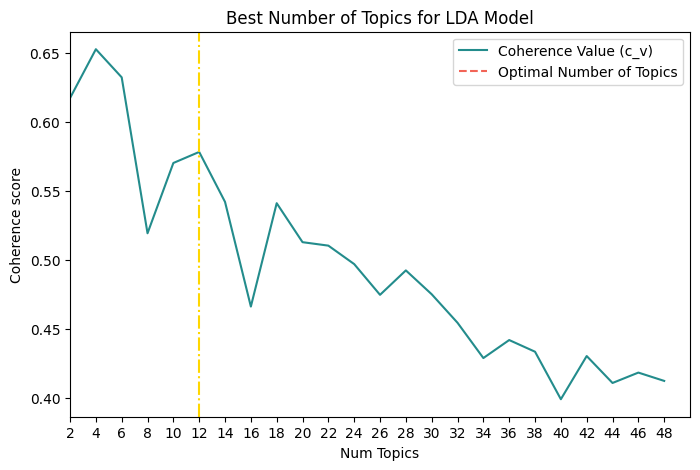

In [54]:
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("Best Number of Topics for LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics

plt.axvline(x=12, color='#FFD700', linestyle='-.')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C',
                          ls='-', label='Coherence Value (c_v)'),
                   Line2D([0], [1], color='#F26457',
                          ls='--', label='Optimal Number of Topics')]

ax.legend(handles=legend_elements, loc='upper right')

In [61]:
temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=100,
    num_topics=12,
    passes=8,
    random_state = 42,
    eval_every=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-08-30 20:57:48,819 : INFO : using autotuned alpha, starting with [0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336]
INFO:gensim.models.ldamodel:using autotuned alpha, starting with [0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336, 0.083333336]
2023-08-30 20:57:48,823 : INFO : using serial LDA version on this node
INFO:gensim.models.ldamodel:using serial LDA version on this node
2023-08-30 20:57:48,832 : INFO : running online (multi-pass

In [62]:
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-08-30 20:59:04,079 : INFO : topic #0 (0.797): 0.051*"engine" + 0.034*"sound" + 0.027*"rear" + 0.027*"low" + 0.021*"turbo" + 0.020*"power" + 0.020*"difference" + 0.020*"run" + 0.016*"oil" + 0.016*"normal"
INFO:gensim.models.ldamodel:topic #0 (0.797): 0.051*"engine" + 0.034*"sound" + 0.027*"rear" + 0.027*"low" + 0.021*"turbo" + 0.020*"power" + 0.020*"difference" + 0.020*"run" + 0.016*"oil" + 0.016*"normal"
2023-08-30 20:59:04,082 : INFO : topic #1 (0.301): 0.037*"oil_change" + 0.026*"link" + 0.025*"box" + 0.024*"answer" + 0.023*"plastic" + 0.022*"extend" + 0.022*"effect" + 0.019*"kit" + 0.018*"pdls" + 0.017*"alloy"
INFO:gensim.models.

(0, '0.051*"engine" + 0.034*"sound" + 0.027*"rear" + 0.027*"low" + 0.021*"turbo" + 0.020*"power" + 0.020*"difference" + 0.020*"run" + 0.016*"oil" + 0.016*"normal"')
(1, '0.037*"oil_change" + 0.026*"link" + 0.025*"box" + 0.024*"answer" + 0.023*"plastic" + 0.022*"extend" + 0.022*"effect" + 0.019*"kit" + 0.018*"pdls" + 0.017*"alloy"')
(2, '0.044*"away" + 0.041*"park" + 0.034*"mph" + 0.030*"hour" + 0.028*"near" + 0.026*"home" + 0.024*"minute" + 0.022*"morning" + 0.021*"head" + 0.019*"night"')
(3, '0.034*"new" + 0.022*"option" + 0.021*"order" + 0.016*"model" + 0.016*"long" + 0.015*"standard" + 0.014*"week" + 0.014*"spec" + 0.013*"way" + 0.012*"gen"')
(4, '0.036*"use" + 0.026*"light" + 0.022*"system" + 0.019*"turn" + 0.016*"work" + 0.015*"try" + 0.015*"stop" + 0.015*"button" + 0.013*"change" + 0.013*"find"')
(5, '0.040*"opc" + 0.031*"issue" + 0.030*"service" + 0.022*"day" + 0.022*"work" + 0.020*"check" + 0.018*"ask" + 0.017*"post" + 0.016*"warranty" + 0.015*"problem"')
(6, '0.042*"road" + 0.

In [63]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_viz)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-08-30 20:59:04,259 : DEBUG : performing inference on a chunk of 45912 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 45912 documents
2023-08-30 20:59:08,021 : DEBUG : 45912/45912 documents converged within 100 iterations
DEBUG:gensim.models.ldamodel:45912/45912 documents converged within 100 iterations


In [64]:
def compute_relevance_gensim(model, dictionary, lambda_val=0.6):
    # Extracting topic-word probabilities
    num_topics = model.num_topics
    num_terms = len(dictionary)
    topic_word_prob = np.zeros((num_topics, num_terms))
    for topic_id in range(num_topics):
        for term, probability in model.get_topic_terms(topic_id):
            topic_word_prob[topic_id, term] = probability

    # Calculate word probabilities across all topics
    word_prob = topic_word_prob.mean(axis=0)
    epsilon = 1e-10  # Small constant
    word_prob += epsilon  # Add the small constant to each value in word_prob

    relevance = lambda_val * topic_word_prob + (1 - lambda_val) * (topic_word_prob / word_prob)

    # Relevance calculation
    relevance = lambda_val * topic_word_prob + (1 - lambda_val) * (topic_word_prob / word_prob)

    return relevance, word_prob


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
relevance_matrix, word_probabilities = compute_relevance_gensim(model, dictionary)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
num_words = 10  # Top 10 words per topic
top_words_per_topic = np.argsort(relevance_matrix, axis=1)[:, -num_words:]

for topic_id, word_ids in enumerate(top_words_per_topic):
    words = [dictionary[i] for i in reversed(word_ids)]
    print(f"Topic {topic_id}: {', '.join(words)}")


Topic 0: engine, sound, rear, low, turbo, power, difference, oil, normal, run
Topic 1: oil_change, link, box, answer, plastic, extend, effect, kit, pdls, alloy
Topic 2: away, park, mph, hour, near, home, minute, morning, head, night
Topic 3: new, option, order, model, long, standard, week, spec, way, gen
Topic 4: use, light, system, turn, try, stop, button, change, find, work
Topic 5: opc, issue, service, day, check, ask, post, warranty, problem, work
Topic 6: road, feel, sport, great, love, test, enjoy, ride, suspension, nice
Topic 7: people, mpg, fuel, live, motorway, diesel, range, sd, cheer, run
Topic 8: seat, battery, door, open, bose, boot, window, mirror, area, approve
Topic 9: wheel, tyre, fit, set, plate, size, wear, cayenne, mm, swap
Topic 10: year, buy, gts, price, cost, pay, quote, sell, agree, month
Topic 11: black, colour, interior, paint, red, leather, white, photo, blue, nice


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-08-30 21:00:46,627 : INFO : topic #0 (0.797): 0.051*"engine" + 0.034*"sound" + 0.027*"rear" + 0.027*"low" + 0.021*"turbo" + 0.020*"power" + 0.020*"difference" + 0.020*"run" + 0.016*"oil" + 0.016*"normal"
INFO:gensim.models.ldamodel:topic #0 (0.797): 0.051*"engine" + 0.034*"sound" + 0.027*"rear" + 0.027*"low" + 0.021*"turbo" + 0.020*"power" + 0.020*"difference" + 0.020*"run" + 0.016*"oil" + 0.016*"normal"
2023-08-30 21:00:46,630 : INFO : topic #1 (0.301): 0.037*"oil_change" + 0.026*"link" + 0.025*"box" + 0.024*"answer" + 0.023*"plastic" + 0.022*"extend" + 0.022*"effect" + 0.019*"kit" + 0.018*"pdls" + 0.017*"alloy"
INFO:gensim.models.

(0, '0.051*"engine" + 0.034*"sound" + 0.027*"rear" + 0.027*"low" + 0.021*"turbo" + 0.020*"power" + 0.020*"difference" + 0.020*"run" + 0.016*"oil" + 0.016*"normal"')
(1, '0.037*"oil_change" + 0.026*"link" + 0.025*"box" + 0.024*"answer" + 0.023*"plastic" + 0.022*"extend" + 0.022*"effect" + 0.019*"kit" + 0.018*"pdls" + 0.017*"alloy"')
(2, '0.044*"away" + 0.041*"park" + 0.034*"mph" + 0.030*"hour" + 0.028*"near" + 0.026*"home" + 0.024*"minute" + 0.022*"morning" + 0.021*"head" + 0.019*"night"')
(3, '0.034*"new" + 0.022*"option" + 0.021*"order" + 0.016*"model" + 0.016*"long" + 0.015*"standard" + 0.014*"week" + 0.014*"spec" + 0.013*"way" + 0.012*"gen"')
(4, '0.036*"use" + 0.026*"light" + 0.022*"system" + 0.019*"turn" + 0.016*"work" + 0.015*"try" + 0.015*"stop" + 0.015*"button" + 0.013*"change" + 0.013*"find"')
(5, '0.040*"opc" + 0.031*"issue" + 0.030*"service" + 0.022*"day" + 0.022*"work" + 0.020*"check" + 0.018*"ask" + 0.017*"post" + 0.016*"warranty" + 0.015*"problem"')
(6, '0.042*"road" + 0.

In [68]:
# Get topic distribution for each document
topic_distributions = [model[doc] for doc in corpus]

df1['Topic_Distribution'] = topic_distributions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
def get_dominant_topic(topic_dist):
    try:
        return sorted(topic_dist, key=lambda x: x[1], reverse=True)[0][0]
    except:
        return None

df1['Dominant_Topic'] = df1['Topic_Distribution'].apply(get_dominant_topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
def topic_scores(topic_dist):
    scores = [0] * model.num_topics
    for topic, score in topic_dist:
        scores[topic] = score
    return scores

# Get topic scores for each comment
df1['Topic_Scores'] = df1['Topic_Distribution'].apply(topic_scores)

# Sum up the topic scores for each brand
brand_topic_sum = df1.groupby('Model')['Topic_Scores'].apply(lambda x: np.sum(np.array(list(x)), axis=0))
brand_topic_df = brand_topic_sum.reset_index()

# Extract individual topic columns for easier analysis
for i in range(model.num_topics):
    brand_topic_df[f'Topic_{i}'] = brand_topic_df['Topic_Scores'].apply(lambda x: x[i])

print(brand_topic_df.head())

                Model                                       Topic_Scores  \
0  Alfa Romeo Stelvio  [623.5919174747542, 223.79454948101193, 309.12...   
1             Audi Q5  [626.6900231055915, 237.01985247898847, 315.59...   
2              BMW X3  [758.0765791898593, 289.0419919146225, 389.845...   
3    Maserati Grecale  [81.38270917441696, 24.814768970012665, 38.364...   
4       Porsche Macan  [1027.4600648870692, 340.82243887800723, 502.2...   

       Topic_0     Topic_1     Topic_2      Topic_3      Topic_4      Topic_5  \
0   623.591917  223.794549  309.125510  1613.456910   890.139260  1173.414897   
1   626.690023  237.019852  315.599883  2056.361588   970.314855  1325.795378   
2   758.076579  289.041992  389.845146  2492.908903  1341.982602  1634.876654   
3    81.382709   24.814769   38.364373   266.796749   126.120366   174.795391   
4  1027.460065  340.822439  502.216822  2830.452989  1461.805731  2045.733608   

       Topic_6      Topic_7     Topic_8     Topic_9     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45912 entries, 0 to 45911
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment             45912 non-null  object 
 1   Name                45398 non-null  object 
 2   Date                45912 non-null  object 
 3   Model               45912 non-null  object 
 4   sentiment_score     45912 non-null  float64
 5   Source              45912 non-null  object 
 6   Comment_len         45912 non-null  int64  
 7   Cleaned_Comment     45912 non-null  object 
 8   Topic_Distribution  45912 non-null  object 
 9   Dominant_Topic      45912 non-null  int64  
 10  Topic_Scores        45912 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.9+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
df1.to_csv('PistonHead_Forums_Cleaned_With_Topic.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
comment_counts = df1.groupby('Model').size().reset_index(name='Comment_Count')
brand_topic_normalized = brand_topic_df.merge(comment_counts, on='Model', how='left')

# Normalize the scores by dividing them by the Comment_Count
for topic in brand_topic_normalized.columns[2:-1]: # Excluding the last column which is Comment_Count
    brand_topic_normalized[topic] = brand_topic_normalized[topic] / brand_topic_normalized['Comment_Count']

# Drop the Comment_Count column after normalization
brand_topic_normalized = brand_topic_normalized.drop(columns='Comment_Count')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


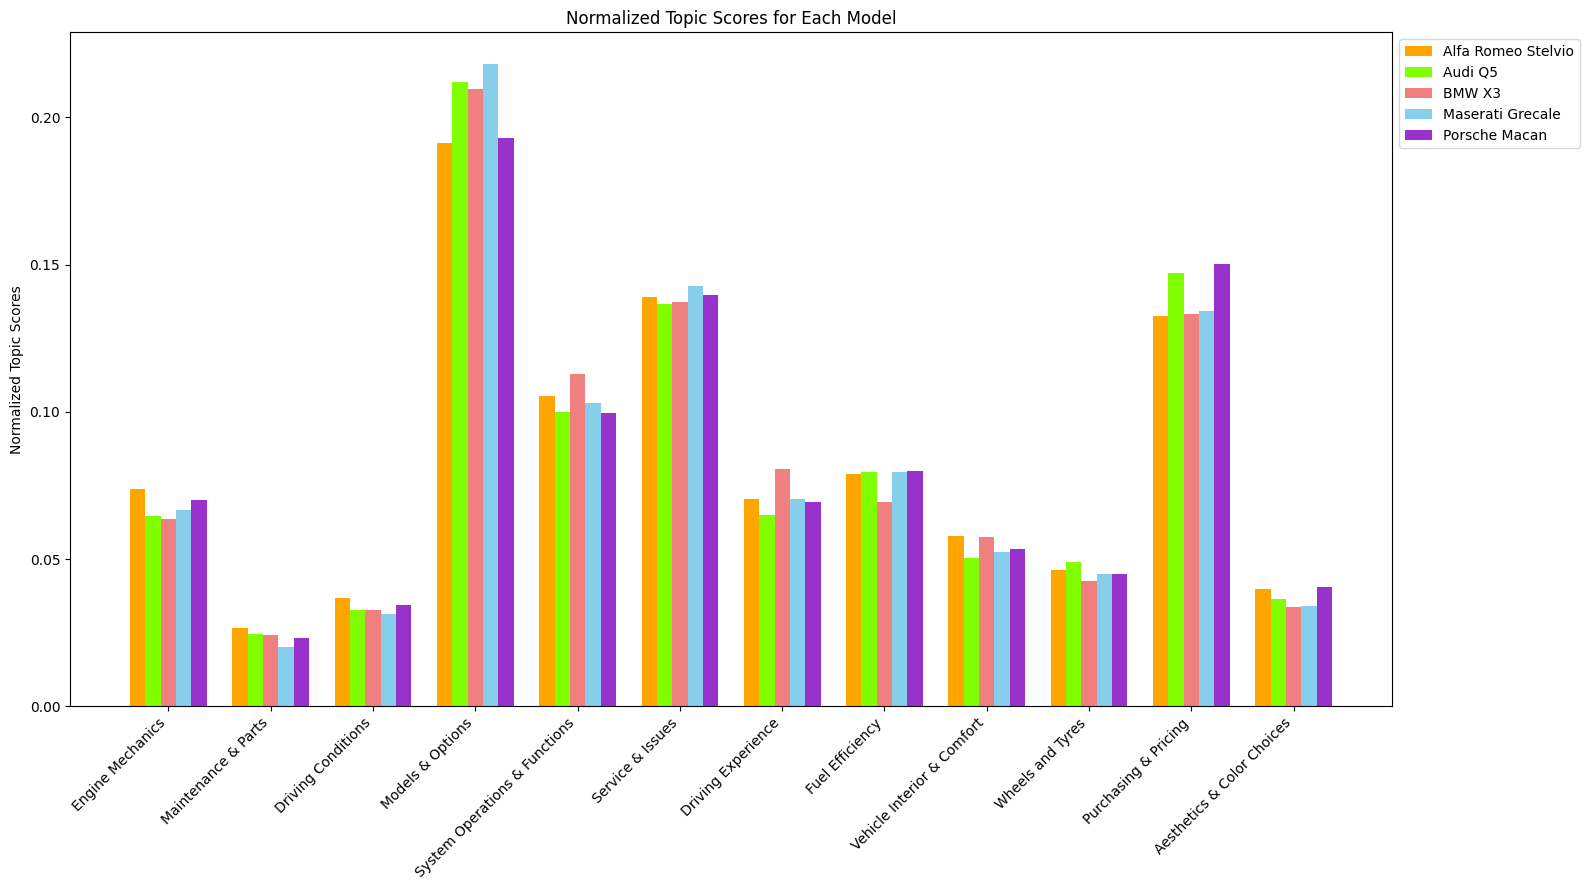

In [85]:
# Setting the figure size and axis
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)

# Number of topics and brands/models
num_topics = brand_topic_normalized.shape[1] - 2  # Excluding 'Model' and 'Topic_Scores' columns
num_brands = brand_topic_normalized.shape[0]

# Define the width of each bar
width = 0.15

# Colors for each brand
colors = ['orange', 'chartreuse', 'lightcoral', 'skyblue', 'darkorchid']

# X values - one set for each topic
ind = np.arange(num_topics)
x = np.linspace(0, num_topics-1, num_topics)

# Plotting bars for each brand/model per topic
for idx, model in enumerate(brand_topic_normalized['Model']):
    scores = brand_topic_normalized.iloc[idx, 2:].tolist()
    bar_positions = x + idx*width  # Shift for each brand/model
    ax.bar(bar_positions, scores, width, label=model, color=colors[idx])

# Adjusting the axis
ax.set_xticks(ind + width*(num_brands-1)/2)

# Topic labels you've identified
topic_labels = [
    "Engine Mechanics", "Maintenance & Parts", "Driving Conditions",
    "Models & Options", "System Operations & Functions", "Service & Issues",
    "Driving Experience", "Fuel Efficiency", "Vehicle Interior & Comfort",
    "Wheels and Tyres", "Purchasing & Pricing", "Aesthetics & Color Choices"
]

ax.set_xticklabels(topic_labels)
plt.xticks(rotation=45, ha='right')

# Setting labels, title, and legend
ax.set_ylabel('Normalized Topic Scores')
ax.set_title('Normalized Topic Scores for Each Model')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Displaying the plot
plt.show()


In [91]:
topic_labels = [
    "Engine Mechanics", "Maintenance & Parts", "Driving Conditions",
    "Models & Options", "System Operations & Functions", "Service & Issues",
    "Driving Experience", "Fuel Efficiency", "Vehicle Interior & Comfort",
    "Wheels and Tyres", "Purchasing & Pricing", "Aesthetics & Color Choices"
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


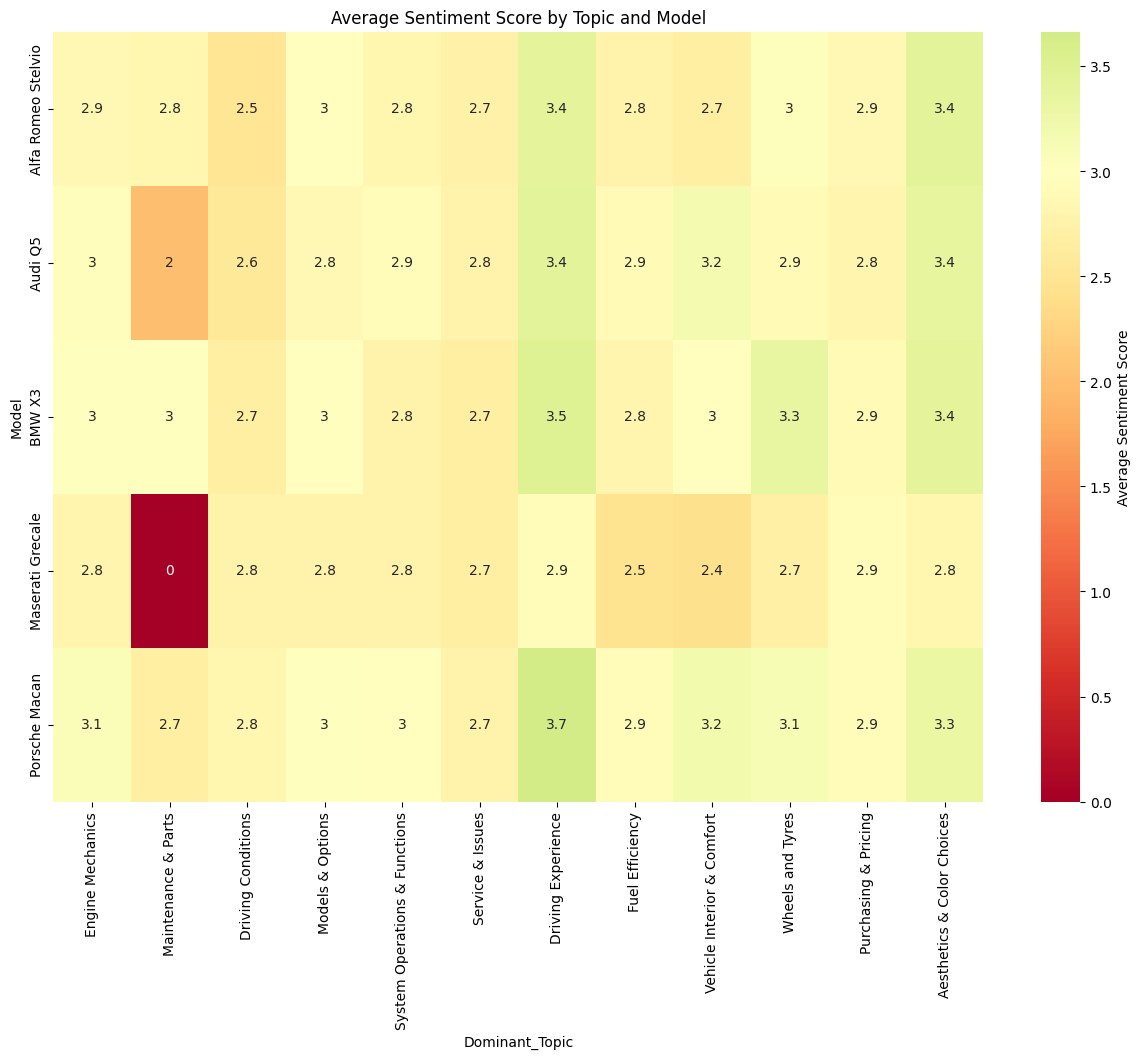

In [100]:
# Calculate average sentiment score for each topic-model combination
topic_model_sentiment = df1.groupby(['Model', 'Dominant_Topic']).agg({'sentiment_score': 'mean'}).unstack().fillna(0)
topic_model_sentiment.columns = topic_model_sentiment.columns.droplevel()

plt.figure(figsize=(15,10))
ax = sns.heatmap(topic_model_sentiment, annot=True, cmap='RdYlGn', center=3, cbar_kws={'label': 'Average Sentiment Score'})
ax.set_xticklabels(topic_labels, rotation=90)  # Add rotation for better visualization
plt.title("Average Sentiment Score by Topic and Model")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


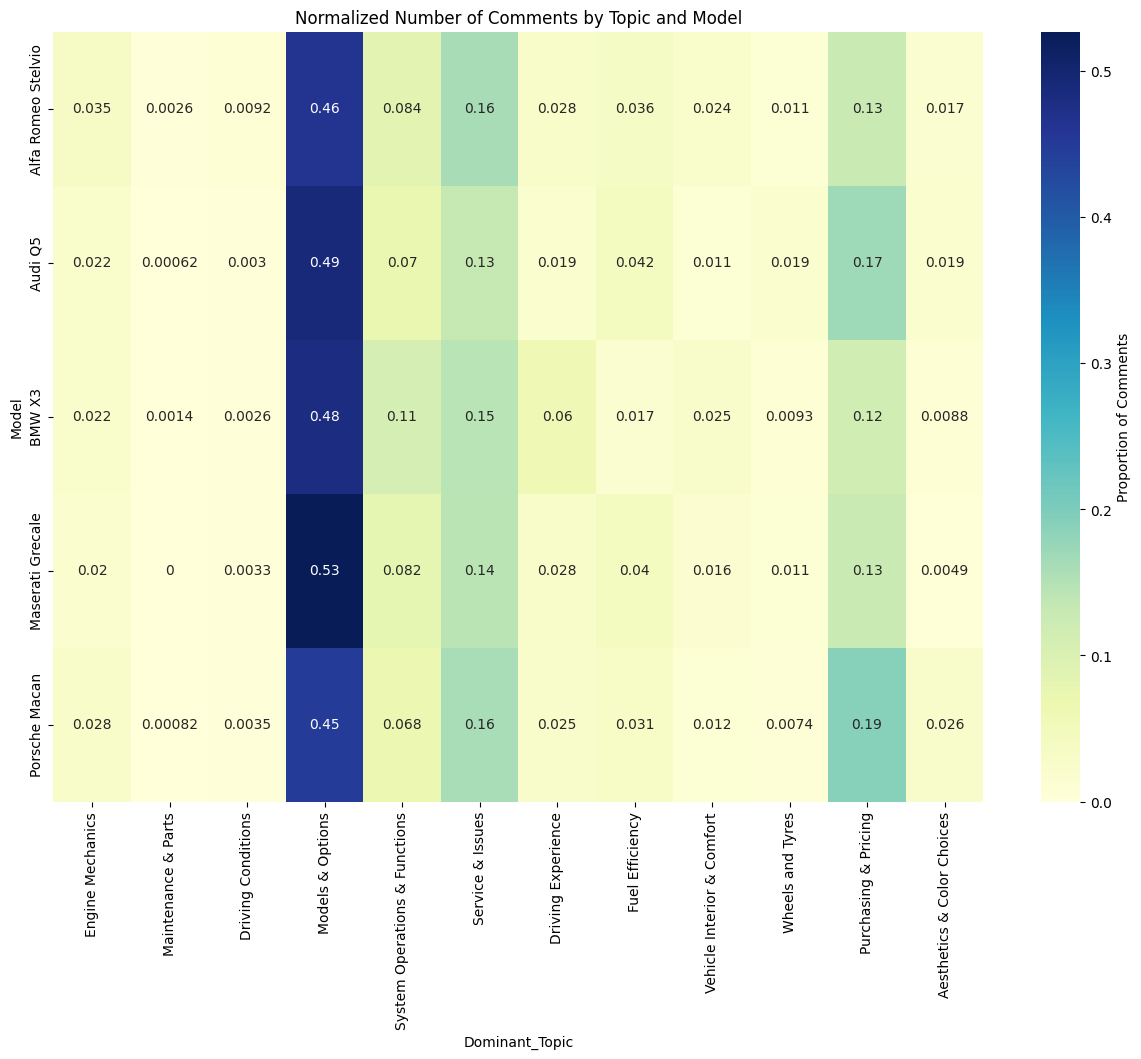

In [101]:
# Calculate normalized count of comments for each topic-model combination
topic_model_normalized_count = df1.groupby(['Model', 'Dominant_Topic']).size().unstack().fillna(0)
topic_model_normalized_count = topic_model_normalized_count.divide(topic_model_normalized_count.sum(axis=1), axis=0)

plt.figure(figsize=(15,10))
ax = sns.heatmap(topic_model_normalized_count, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Proportion of Comments'})
ax.set_xticklabels(topic_labels, rotation=90)  # Add rotation for better visualization
plt.title("Normalized Number of Comments by Topic and Model")
plt.show()


## Grecale

In [102]:
grecale_df = df1[df1['Model'] == 'Maserati Grecale']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
print(grecale_df['Dominant_Topic'].unique())

[ 3  5  4 10  7  6  9  0 11  8  2]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
grecale_df['Dominant_Topic_label'] = grecale_df['Dominant_Topic'].replace(topic_labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-110-6561c9b28563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grecale_df['Dominant_Topic_label'] = grecale_df['Dominant_Topic'].replace(topic_labels)


In [112]:
# Compute average sentiment scores for each topic
topic_sentiment = grecale_df.groupby('Dominant_Topic_label')['sentiment_score'].mean()

# Interpretations for the topics
topic_labels = {
    0: "Engine Mechanics",
    1: "Maintenance & Parts",
    2: "Driving Conditions",
    3: "Models & Options",
    4: "System Operations & Functions",
    5: "Service & Issues",
    6: "Driving Experience",
    7: "Fuel Efficiency",
    8: "Vehicle Interior & Comfort",
    9: "Wheels and Tyres",
    10: "Purchasing & Pricing",
    11: "Aesthetics & Color Choices"
}

# Replace topic numbers with interpretations for better readability
topic_sentiment = topic_sentiment.rename(index=topic_labels)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# Recalculate the sentiment frequencies
sentiment_freq = grecale_df.groupby('Dominant_Topic_label')['sentiment_score'].value_counts().unstack().fillna(0)

# Convert counts to percentages
sentiment_percent = sentiment_freq.divide(sentiment_freq.sum(axis=1), axis=0)

# Sorting the average sentiment values
sorted_topics = topic_sentiment.sort_values().index.tolist()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
sentiment_percent = sentiment_percent.rename(index=topic_labels)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
missing_topics = set(topic_labels.values()) - set(grecale_df['Dominant_Topic_label'].unique())
if missing_topics:
    print(f"Missing topics: {', '.join(missing_topics)}")


Missing topics: Maintenance & Parts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


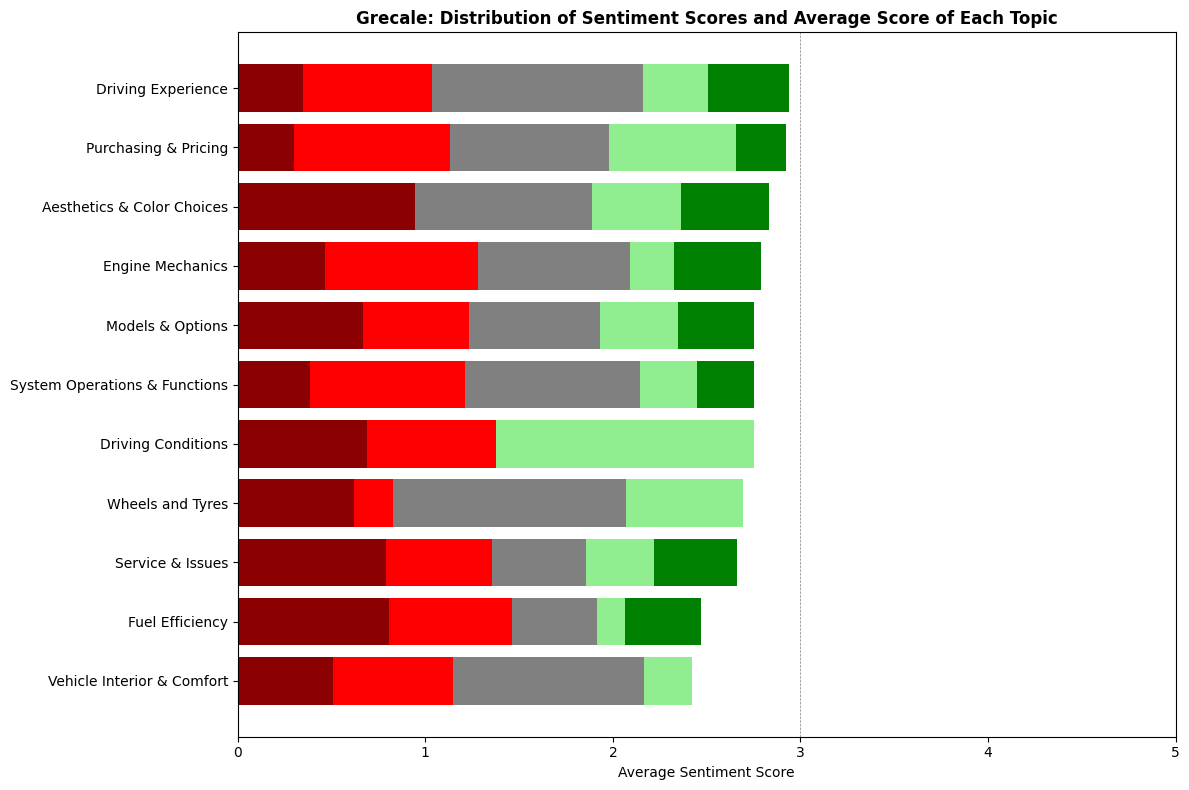

In [117]:
# Plotting
fig, ax = plt.subplots(figsize=(12,8))

# Define the colors
colors = ['darkred', 'red', 'grey', 'lightgreen', 'green']

# Plot bars for each topic
for topic in sorted_topics:
    avg_score = topic_sentiment[topic]

    # The start of the bar (used for stacking)
    left = 0

    # Iterate through each sentiment score's percentage
    for score, color in zip(sentiment_percent.columns, colors):
        # Width is the percentage of the sentiment score multiplied by the average sentiment score for that topic
        width = sentiment_percent.loc[topic, score] * avg_score
        ax.barh(topic, width, color=color, left=left, align='center')
        left += width

ax.set_xlabel('Average Sentiment Score')
ax.set_title('Grecale: Distribution of Sentiment Scores and Average Score of Each Topic',fontweight='bold')
ax.axvline(3, color='grey', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 5)  # Set x-axis limits
ax.set_xticks(range(6))  # Set x-axis tick positions

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


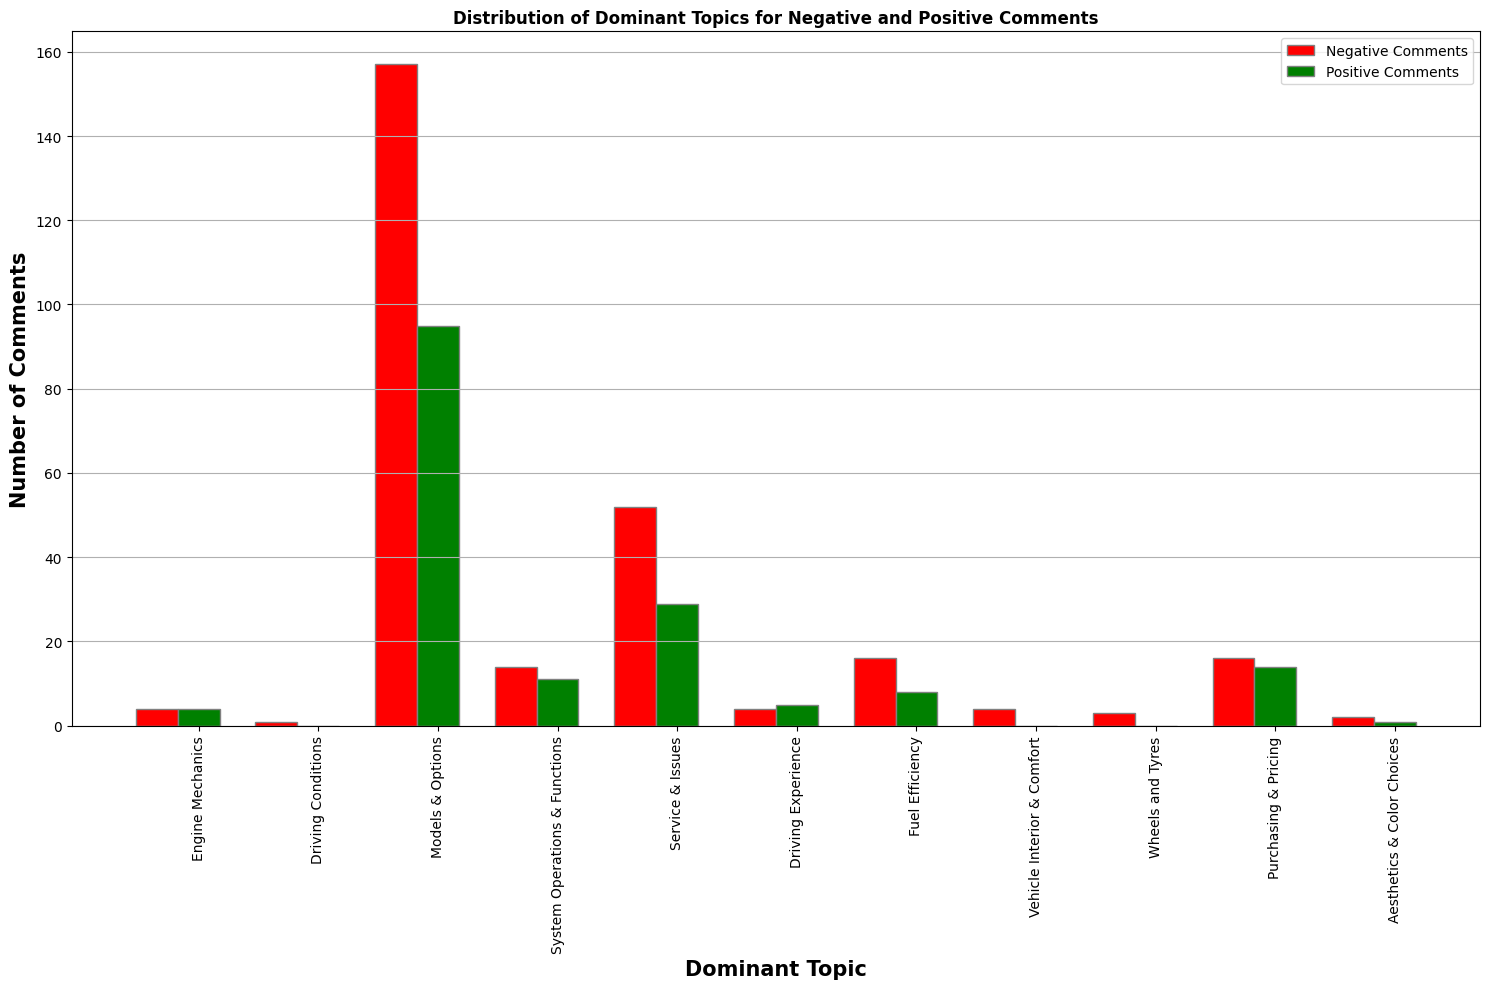

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Filter dataframe for sentiment scores lower than 2 and above 3
negative_comments_df = grecale_df[grecale_df['sentiment_score'] < 2]
positive_comments_df = grecale_df[grecale_df['sentiment_score'] > 4]

topic_labels = {
    0: "Engine Mechanics",
    1: "Maintenance & Parts",
    2: "Driving Conditions",
    3: "Models & Options",
    4: "System Operations & Functions",
    5: "Service & Issues",
    6: "Driving Experience",
    7: "Fuel Efficiency",
    8: "Vehicle Interior & Comfort",
    9: "Wheels and Tyres",
    10: "Purchasing & Pricing",
    11: "Aesthetics & Color Choices"
}


# Get the count of each dominant topic
negative_topic_counts = negative_comments_df['Dominant_Topic'].value_counts()
positive_topic_counts = positive_comments_df['Dominant_Topic'].value_counts()

# Sort topics for a consistent representation
all_topics = sorted(list(set(grecale_df['Dominant_Topic'])))
negative_topic_counts = negative_topic_counts.reindex(all_topics).fillna(0)
positive_topic_counts = positive_topic_counts.reindex(all_topics).fillna(0)

# Plotting
bar_width = 0.35
r1 = np.arange(len(all_topics))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(15,10))

plt.bar(r1, negative_topic_counts, color='red', width=bar_width, edgecolor='grey', label='Negative Comments')
plt.bar(r2, positive_topic_counts, color='green', width=bar_width, edgecolor='grey', label='Positive Comments')

# Add labels to the chart
plt.xlabel('Dominant Topic', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(all_topics))], [topic_labels[topic] for topic in all_topics], rotation=90)
plt.ylabel('Number of Comments', fontweight='bold', fontsize=15)
plt.title('Distribution of Dominant Topics for Negative and Positive Comments', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [135]:
df1['Date'] = pd.to_datetime(df1['Date'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
grecale_df = df1[df1['Model'] == 'Maserati Grecale']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
grecale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 1013 to 2236
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Comment             1224 non-null   object        
 1   Name                1224 non-null   object        
 2   Date                1224 non-null   datetime64[ns]
 3   Model               1224 non-null   object        
 4   sentiment_score     1224 non-null   float64       
 5   Source              1224 non-null   object        
 6   Comment_len         1224 non-null   int64         
 7   Cleaned_Comment     1224 non-null   object        
 8   Topic_Distribution  1224 non-null   object        
 9   Dominant_Topic      1224 non-null   int64         
 10  Topic_Scores        1224 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 114.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
# Create a helper function to extract topic proportion from the tuple structure
def get_topic_proportion(distribution, topic):
    for t, proportion in distribution:
        if t == topic:
            return proportion
    return 0

results = []

# For each unique date
for date in grecale_df['Date'].unique():
    date_data = {'Date': date}

    # For each unique topic in Dominant_Topic
    for k in range(12): # Assuming 16 topics
        # Calculate theta_k[t]
        numerator = sum([get_topic_proportion(row['Topic_Distribution'], k) for _, row in grecale_df[grecale_df['Date'] == date].iterrows()])
        denominator = len(grecale_df[grecale_df['Date'] == date])
        theta_k_t = numerator / denominator

        date_data[f"Topic_{k}"] = theta_k_t

    results.append(date_data)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Date')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


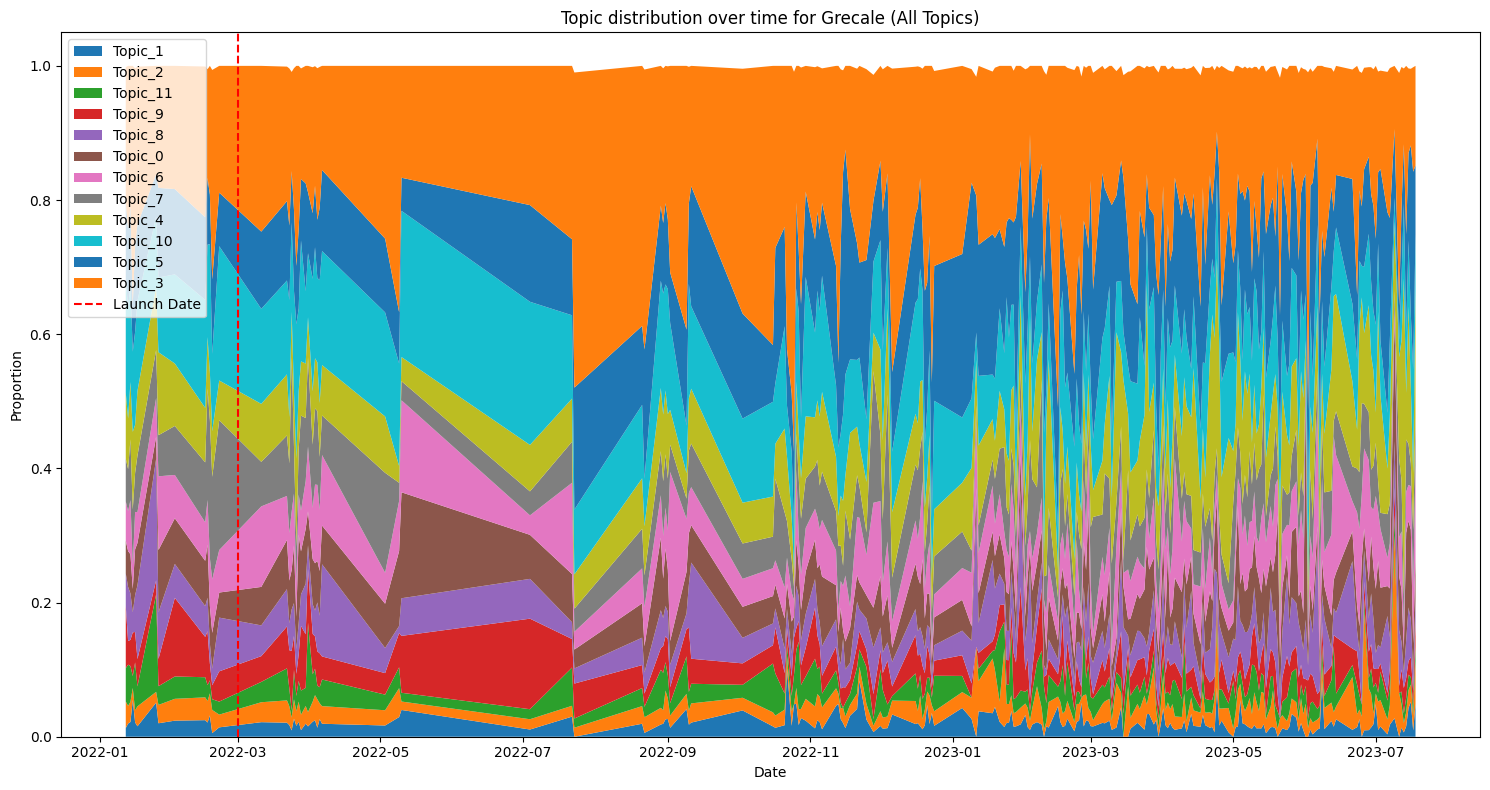

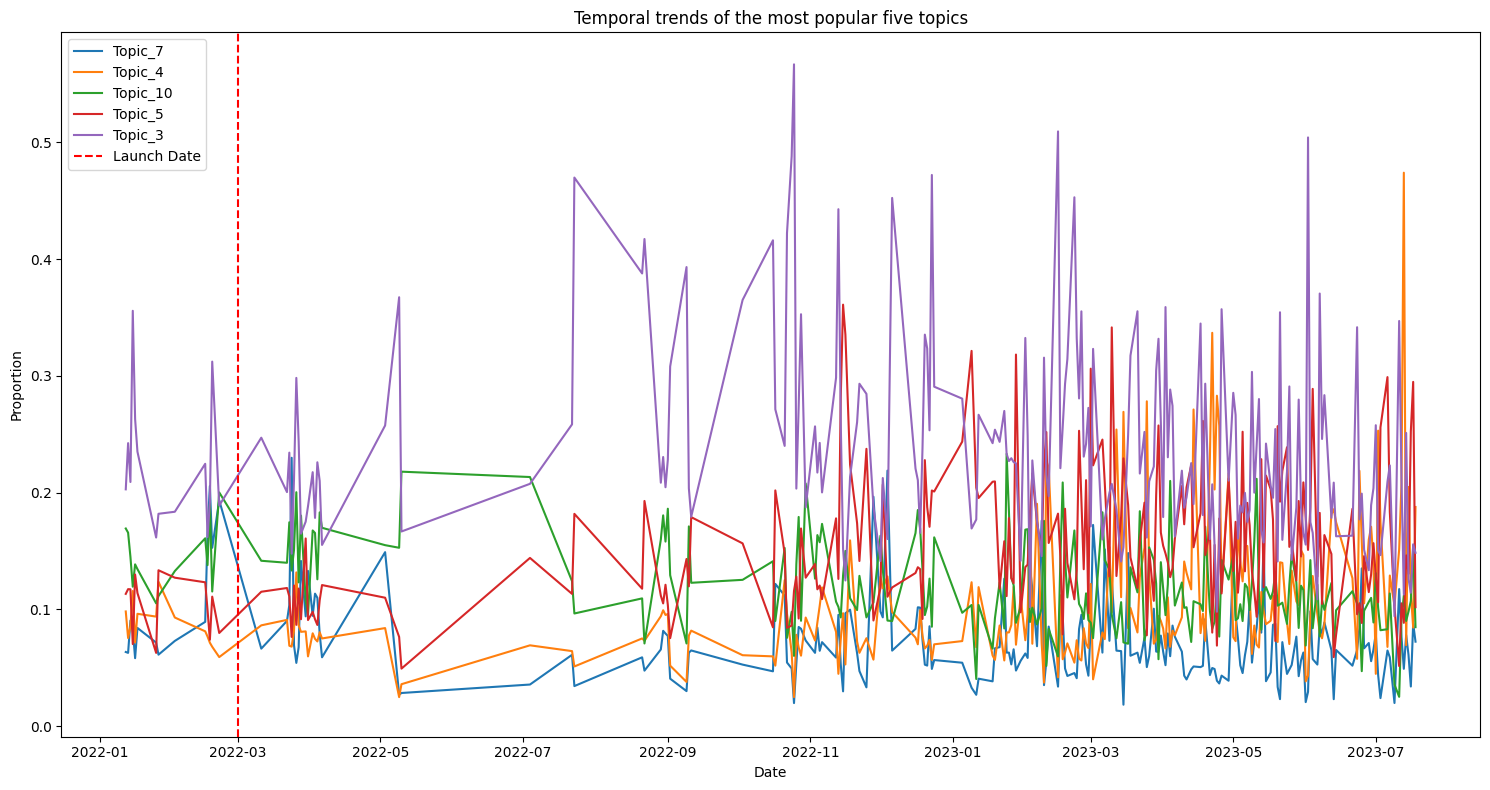

In [141]:
# Calculate the sum for each topic over all dates to determine popularity
topic_sums = {topic: results_df[topic].sum() for topic in results_df.columns if "Topic_" in topic}
sorted_topics = sorted(topic_sums.keys(), key=lambda x: topic_sums[x])

# Plot the full stacked area chart
plt.figure(figsize=(15, 8))
plt.stackplot(results_df['Date'], *[results_df[topic] for topic in sorted_topics], labels=sorted_topics)
plt.axvline(pd.Timestamp('2022-03-01'), color='red', linestyle='--', label='Launch Date')
plt.legend(loc='upper left')
plt.title("Topic distribution over time for Grecale (All Topics)")
plt.xlabel("Date")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

# Plot the top 5 topics in a separate graph
top_topics = sorted_topics[-5:]
plt.figure(figsize=(15, 8))
for topic in top_topics:
    plt.plot(results_df['Date'], results_df[topic], label=topic)

plt.axvline(pd.Timestamp('2022-03-01'), color='red', linestyle='--', label='Launch Date')
plt.legend(loc='upper left')
plt.title("Temporal trends of the most popular five topics")
plt.xlabel("Date")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [142]:
# Set the Date column as the index if it's not already
if 'Date' in grecale_df.columns:
    grecale_df.set_index('Date', inplace=True)

# This function will help compute θ values for each topic over time
def compute_theta(topic_data):
    # Extracting the topic distributions
    distributions = topic_data['Topic_Distribution']

    # If there's no data, return zeros
    if len(distributions) == 0:
        return pd.Series({k: 0 for k in range(16)})

    # Initializing a dictionary to store the sums for each topic
    topic_sums = {k:0 for k in range(16)}  # We have 16 topics based on the data you provided

    # Computing the sums for each topic
    for dist in distributions:
        for topic, value in dist:
            topic_sums[topic] += value

    # Computing the θ values (sums divided by the number of documents)
    for topic in topic_sums:
        topic_sums[topic] /= len(distributions)

    return pd.Series(topic_sums)

# Grouping by month and applying the function
grouped_data = grecale_df.groupby(grecale_df.index.to_period('M'))
theta_values = grouped_data.apply(compute_theta)

# Convert Period index to datetime index
theta_values.index = theta_values.index.to_timestamp()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


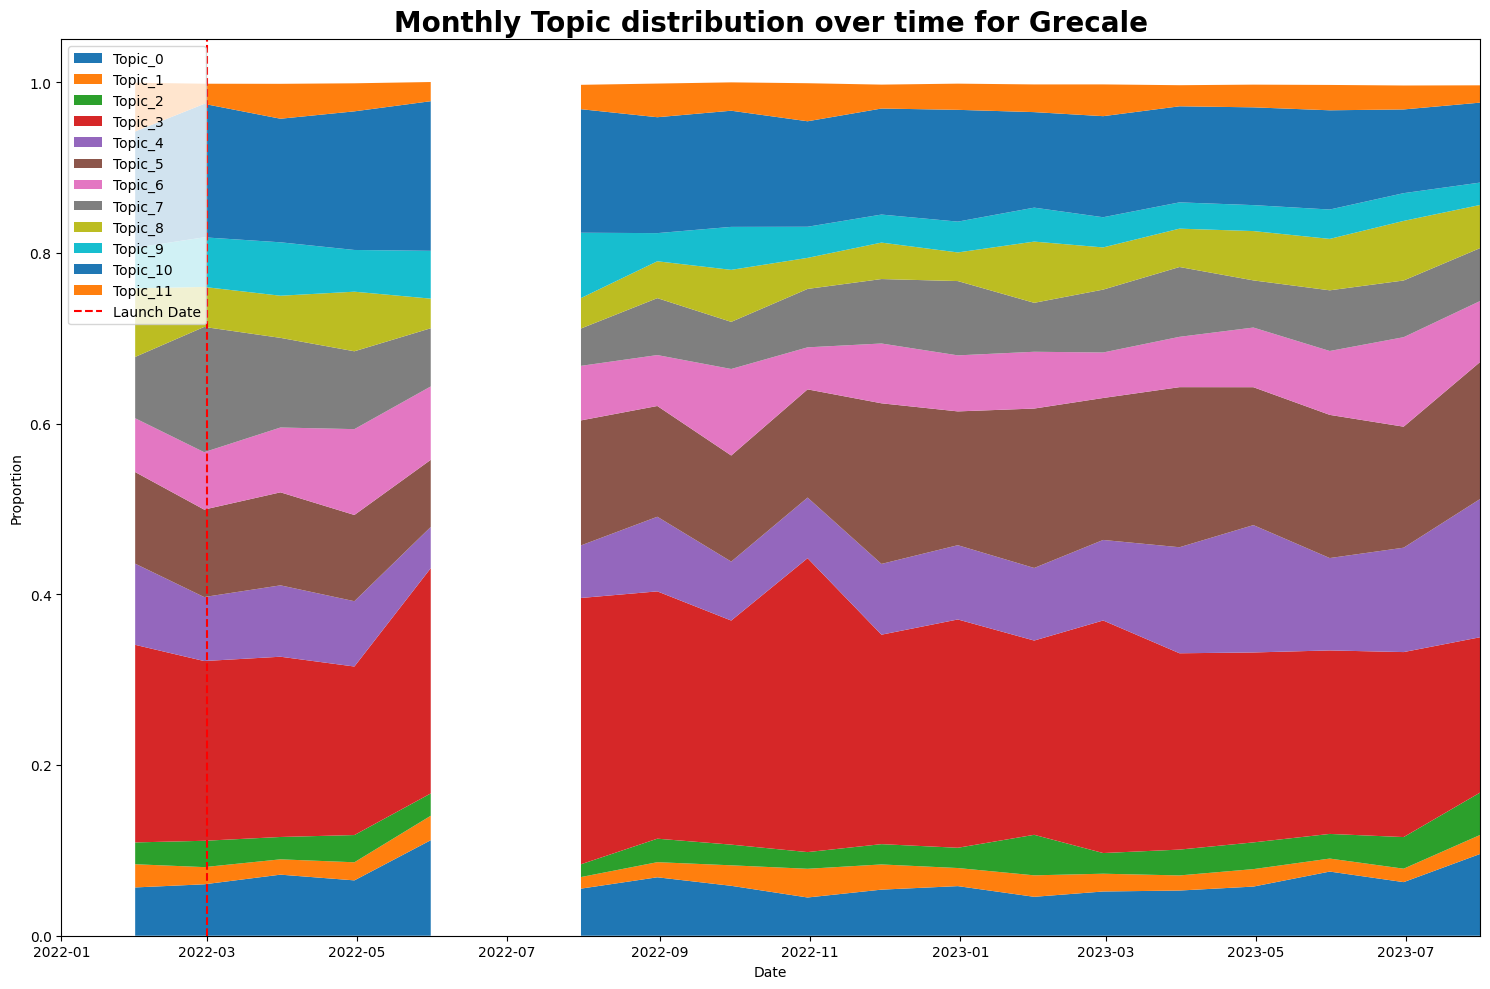

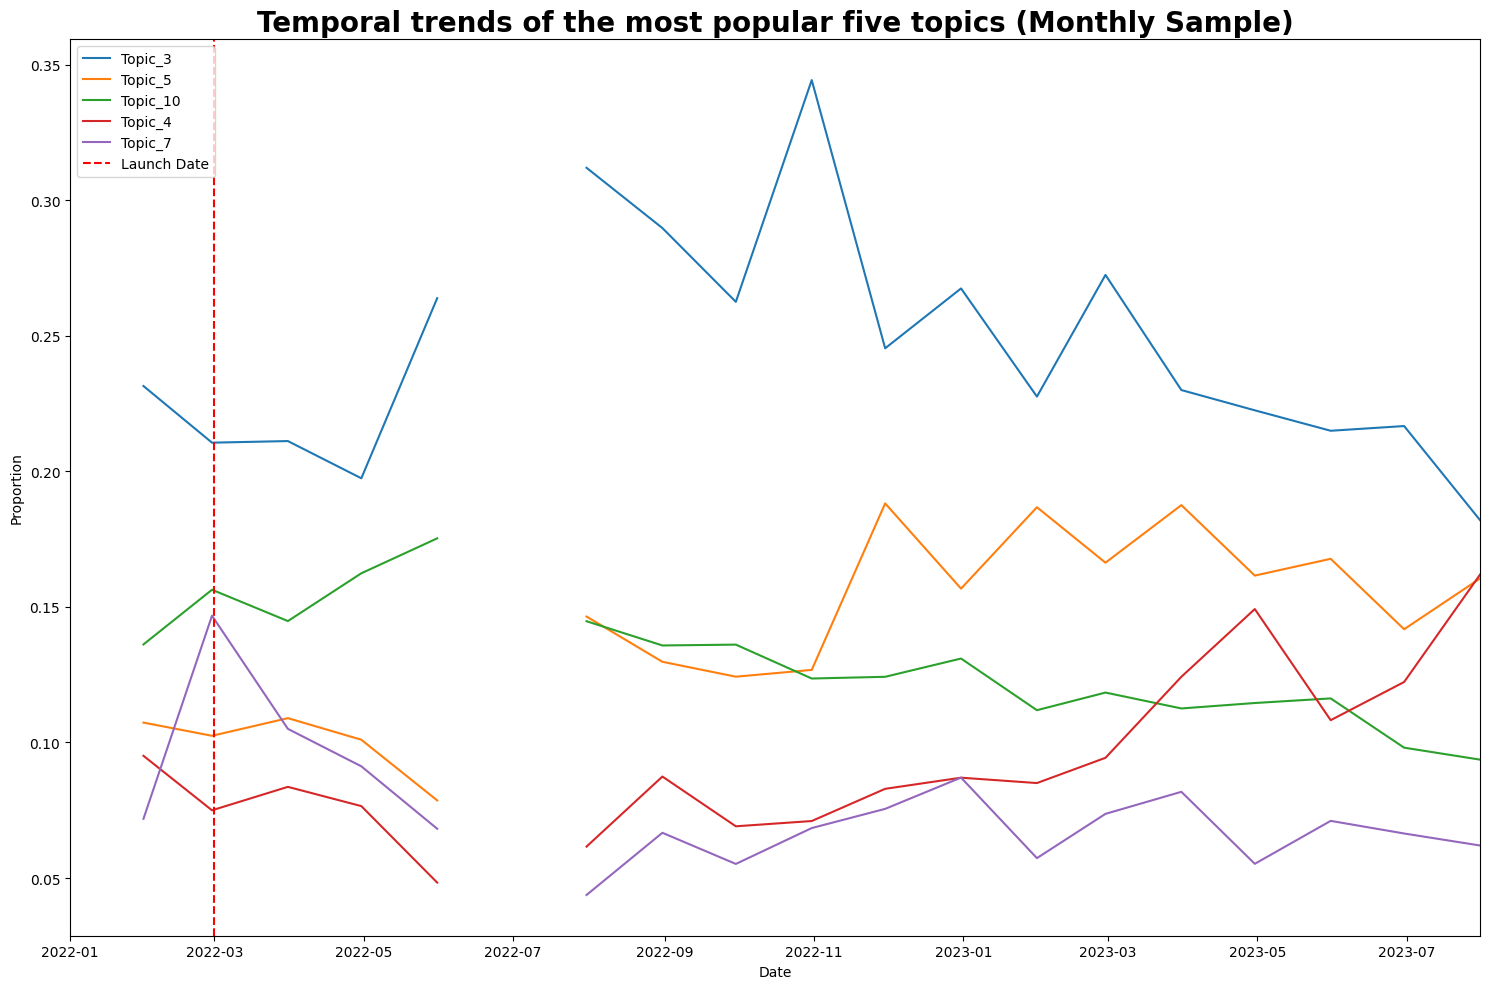

In [143]:
# Resample the dataframe by month
monthly_results_df = results_df.resample('M', on='Date').mean()

# Calculate the sum for each topic over all dates to determine popularity
topic_sums = {topic: monthly_results_df[topic].sum() for topic in monthly_results_df.columns if "Topic_" in topic}
sorted_topics = sorted(topic_sums.keys(), key=lambda x: topic_sums[x], reverse=True)

# Select the topics you want to plot (up to the maximum topic index present in your dataframe)
max_topic_index = max([int(topic.split('_')[1]) for topic in monthly_results_df.columns if "Topic_" in topic])
topics_to_plot = [f"Topic_{i}" for i in range(max_topic_index + 1)]

# Plot the full stacked area chart
plt.figure(figsize=(15, 10))
plt.stackplot(monthly_results_df.index, *[monthly_results_df[topic] for topic in topics_to_plot], labels=topics_to_plot)
plt.axvline(pd.Timestamp('2022-03-01'), color='red', linestyle='--', label='Launch Date')
plt.legend(loc='upper left')
plt.title("Monthly Topic distribution over time for Grecale", fontsize=20, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Proportion")
plt.tight_layout()
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-07-31'))  # Set x-axis limits to exclude the gap
plt.show()

# Plot the top 5 topics in a separate graph
top_topics = sorted_topics[:5]  # Select the top 5 topics
plt.figure(figsize=(15, 10))
for topic in top_topics:
    plt.plot(monthly_results_df.index, monthly_results_df[topic], label=topic)

plt.axvline(pd.Timestamp('2022-03-01'), color='red', linestyle='--', label='Launch Date')
plt.legend(loc='upper left')
plt.title("Temporal trends of the most popular five topics (Monthly Sample)", fontsize=20, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Proportion")
plt.tight_layout()
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-07-31'))  # Set x-axis limits to exclude the gap
plt.show()
